# Defining the Question

### a) Specifying the Question

Analyze the Bitcoin data and  determine whether the price is currently  in a bubble or not

### b) Understanding the context 

Cryptocurrencies are distributed digital assets that allow for speedy transactions between parties, secured by cryptography. The most famous, Bitcoin, emerged in 2009 after the 2008  global monetary crisis.

In trading, the connection is even stronger because the decisions that traders make are fully connected with the price. This means that, if everyone agrees that the crypto behavior it’s predicting that the price will go up, it’s the same people that will be betting on that, then, it’s a fact that the price will be rising until a certain point.

Bitcoin is usually the initial coin that is  invested in and then leads the market. People invest in it then invest into other coins. Therefore, the price activity of Bitcoin usually predicts the general trend of the cryptocurrency market that now has over 3,000 other coins.

This being a global interconnected market, the price fluctuates depending on the players from all over the world. Due to this, many scams, some targeting Kenyans emerged in 2017; when the Bitcoin Hype was at its previous peak. The hype has resurfaced in 2021. Analysis will be done and a model predicted to guide investor's decisions. 


### c) Defining the Metric for Success

The success of this project will depend on the following conditions:

  i)When the mean absolute percentage error (mape) is minimised

 ii)When we are able to deploy our models successfully. 


### d) Recording the Experimental Design

1. Defining the Question
2. Reading the Data.
3. Checking the Data.
4. Data Cleaning
5. Performing EDA
6. Modelling
7. Evaluation of the solution
8. Challenging the solution 
9. Conclusion

### e) Data Relevance

The data provided is relevant to the nature of our project because it cointains information on Bitcoin.

# Data Preparation

### Import Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Let import libraries that we will need for our analysis
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib
import re
from matplotlib import pyplot as plt



# set off the warnings that may appear
import warnings
warnings.filterwarnings(action='ignore') 

### Loading and Previewing our Dataset

In [ ]:
#There are six datasets.
bitfinex =  pd.read_csv('/content/BTC_USD Bitfinex Historical Data.csv')
bitcoin = pd.read_csv('/content/Bitcoin Historical Data Index.csv')
dowjones = pd.read_csv('/content/Dow Jones Industrial Average Historical Data.csv')
nasdaq = pd.read_csv('/content/NASDAQ Composite Historical Data.csv')
sp = pd.read_csv('/content/S&P 500 Historical Data.csv')
trends = pd.read_csv('/content/Bitcoin Google Trends.csv')

Check the shape of each dataset in order to get an idea of the best way to merge

In [ ]:
bitfinex.shape

(3356, 7)

In [ ]:
bitcoin.shape

(3391, 7)

In [ ]:
dowjones.shape

(2335, 7)

In [ ]:
nasdaq.shape

(2335, 7)

In [ ]:
sp.shape

(2335, 7)

In [ ]:
trends.shape

(2899, 2)

Preview each dataset to get a better understanding.


In [ ]:
bitcoin.head()

,Date,price_bitcoin,open_bitcoin,high_bitcoin,low_bitcoin,vol_bitcoin,Change_bitcoin %
0,14-Apr-21,"62,795.90","63,544.20","64,778.00","62,557.40",116.57K,-1.17%
1,13-Apr-21,"63,540.90","59,863.60","63,659.00","59,839.40",126.56K,6.14%
2,12-Apr-21,"59,863.80","59,982.10","61,259.90","59,569.20",81.88K,-0.19%
3,11-Apr-21,"59,978.70","59,772.40","60,667.10","59,250.30",58.20K,0.39%
4,10-Apr-21,"59,748.40","58,127.40","61,229.00","57,900.00",103.72K,2.80%


In [ ]:
bitfinex.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,14-Apr-21,"63,546.00","63,518.00","64,374.00","62,826.00",9.99K,0.04%
1,13-Apr-21,"63,518.00","59,900.00","63,518.00","59,900.00",11.26K,6.04%
2,12-Apr-21,"59,900.00","60,034.80","60,701.00","59,747.00",5.50K,-0.22%
3,11-Apr-21,"60,034.80","59,823.80","60,486.00","59,411.00",4.65K,0.35%
4,10-Apr-21,"59,823.80","58,114.00","60,984.00","58,114.00",9.79K,2.94%


In [ ]:
dowjones.head()

,Date,price_dowjones,open_dowjones,high_dowjones,low_dowjones,vol_dowjones,change_dowjones
0,14-Apr-21,"33,874.69","33,668.95","33,910.59","33,668.95",175.46M,0.59%
1,13-Apr-21,"33,677.27","33,721.16","33,741.64","33,545.84",330.00M,-0.20%
2,12-Apr-21,"33,745.40","33,775.06","33,786.19","33,665.54",329.02M,-0.16%
3,9-Apr-21,"33,800.60","33,526.19","33,810.87","33,526.19",317.82M,0.89%
4,8-Apr-21,"33,503.57","33,469.89","33,506.80","33,342.64",306.19M,0.17%


In [ ]:
nasdaq.head()

,Date,price_nasdaq,open_nasdaq,high_nasdaq,low_nasdaq,vol_nasdaq,change_nasdaq
0,14-Apr-21,"13,947.08","14,004.07","14,033.63","13,928.49",439.56M,-0.35%
1,13-Apr-21,"13,996.10","13,902.45","14,011.51","13,902.45",839.45M,1.05%
2,12-Apr-21,"13,850.00","13,854.44","13,877.00","13,783.95",894.01M,-0.36%
3,9-Apr-21,"13,900.18","13,787.01","13,905.41","13,748.35",785.76M,0.51%
4,8-Apr-21,"13,829.31","13,796.89","13,830.14","13,758.71",870.92M,1.03%


In [ ]:
sp.head()

,Date,price_sp,open_sp,high_sp,low_sp,vol_sp,change_sp
0,14-Apr-21,"4,141.84","4,140.40","4,151.97","4,138.20",-,0.01%
1,13-Apr-21,"4,141.59","4,130.10","4,148.00","4,124.43",-,0.33%
2,12-Apr-21,"4,127.99","4,124.71","4,131.76","4,114.82",-,-0.02%
3,9-Apr-21,"4,128.80","4,096.11","4,129.48","4,095.51",-,0.77%
4,8-Apr-21,"4,097.17","4,089.95","4,098.19","4,082.54",-,0.42%


In [ ]:
trends.head()

,Date,bitcoins
0,1/1/2012,26
1,1/2/2012,27
2,1/3/2012,38
3,1/4/2012,18
4,1/5/2012,25


It is already clear that the dates are written in inconsistent formats. We shall convert each to a consistent one.

In [ ]:
bitcoin['Date'] = pd.to_datetime(bitcoin['Date']).dt.date
bitcoin.head()

,Date,price_bitcoin,open_bitcoin,high_bitcoin,low_bitcoin,vol_bitcoin,Change_bitcoin %
0,2021-04-14,"62,795.90","63,544.20","64,778.00","62,557.40",116.57K,-1.17%
1,2021-04-13,"63,540.90","59,863.60","63,659.00","59,839.40",126.56K,6.14%
2,2021-04-12,"59,863.80","59,982.10","61,259.90","59,569.20",81.88K,-0.19%
3,2021-04-11,"59,978.70","59,772.40","60,667.10","59,250.30",58.20K,0.39%
4,2021-04-10,"59,748.40","58,127.40","61,229.00","57,900.00",103.72K,2.80%


In [ ]:
bitfinex['Date'] = pd.to_datetime(bitfinex['Date']).dt.date
bitfinex.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-04-14,"63,546.00","63,518.00","64,374.00","62,826.00",9.99K,0.04%
1,2021-04-13,"63,518.00","59,900.00","63,518.00","59,900.00",11.26K,6.04%
2,2021-04-12,"59,900.00","60,034.80","60,701.00","59,747.00",5.50K,-0.22%
3,2021-04-11,"60,034.80","59,823.80","60,486.00","59,411.00",4.65K,0.35%
4,2021-04-10,"59,823.80","58,114.00","60,984.00","58,114.00",9.79K,2.94%


In [ ]:
dowjones['Date'] = pd.to_datetime(dowjones['Date']).dt.date
dowjones.head()

,Date,price_dowjones,open_dowjones,high_dowjones,low_dowjones,vol_dowjones,change_dowjones
0,2021-04-14,"33,874.69","33,668.95","33,910.59","33,668.95",175.46M,0.59%
1,2021-04-13,"33,677.27","33,721.16","33,741.64","33,545.84",330.00M,-0.20%
2,2021-04-12,"33,745.40","33,775.06","33,786.19","33,665.54",329.02M,-0.16%
3,2021-04-09,"33,800.60","33,526.19","33,810.87","33,526.19",317.82M,0.89%
4,2021-04-08,"33,503.57","33,469.89","33,506.80","33,342.64",306.19M,0.17%


In [ ]:
nasdaq['Date'] = pd.to_datetime(nasdaq['Date']).dt.date
nasdaq.head()

,Date,price_nasdaq,open_nasdaq,high_nasdaq,low_nasdaq,vol_nasdaq,change_nasdaq
0,2021-04-14,"13,947.08","14,004.07","14,033.63","13,928.49",439.56M,-0.35%
1,2021-04-13,"13,996.10","13,902.45","14,011.51","13,902.45",839.45M,1.05%
2,2021-04-12,"13,850.00","13,854.44","13,877.00","13,783.95",894.01M,-0.36%
3,2021-04-09,"13,900.18","13,787.01","13,905.41","13,748.35",785.76M,0.51%
4,2021-04-08,"13,829.31","13,796.89","13,830.14","13,758.71",870.92M,1.03%


In [ ]:
sp['Date'] = pd.to_datetime(sp['Date']).dt.date
sp.head()

,Date,price_sp,open_sp,high_sp,low_sp,vol_sp,change_sp
0,2021-04-14,"4,141.84","4,140.40","4,151.97","4,138.20",-,0.01%
1,2021-04-13,"4,141.59","4,130.10","4,148.00","4,124.43",-,0.33%
2,2021-04-12,"4,127.99","4,124.71","4,131.76","4,114.82",-,-0.02%
3,2021-04-09,"4,128.80","4,096.11","4,129.48","4,095.51",-,0.77%
4,2021-04-08,"4,097.17","4,089.95","4,098.19","4,082.54",-,0.42%


In [ ]:
trends['Date'] = pd.to_datetime(trends['Date']).dt.date
trends.head()

,Date,bitcoins
0,2012-01-01,26
1,2012-01-02,27
2,2012-01-03,38
3,2012-01-04,18
4,2012-01-05,25


Merging

In [ ]:
from functools import reduce
data = [bitcoin,bitfinex,dowjones,nasdaq,sp,trends]
merged = reduce(lambda  left,right: pd.merge(left,right,on=['Date'],
                                            how='outer'), data)
merged

,Date,price_bitcoin,open_bitcoin,high_bitcoin,low_bitcoin,vol_bitcoin,Change_bitcoin %,Price,Open,High,Low,Vol.,Change %,price_dowjones,open_dowjones,high_dowjones,low_dowjones,vol_dowjones,change_dowjones,price_nasdaq,open_nasdaq,high_nasdaq,low_nasdaq,vol_nasdaq,change_nasdaq,price_sp,open_sp,high_sp,low_sp,vol_sp,change_sp,bitcoins
0,2021-04-14,"62,795.90","63,544.20","64,778.00","62,557.40",116.57K,-1.17%,"63,546.00","63,518.00","64,374.00","62,826.00",9.99K,0.04%,"33,874.69","33,668.95","33,910.59","33,668.95",175.46M,0.59%,"13,947.08","14,004.07","14,033.63","13,928.49",439.56M,-0.35%,"4,141.84","4,140.40","4,151.97","4,138.20",-,0.01%,NaN
1,2021-04-13,"63,540.90","59,863.60","63,659.00","59,839.40",126.56K,6.14%,"63,518.00","59,900.00","63,518.00","59,900.00",11.26K,6.04%,"33,677.27","33,721.16","33,741.64","33,545.84",330.00M,-0.20%,"13,996.10","13,902.45","14,011.51","13,902.45",839.45M,1.05%,"4,141.59","4,130.10","4,148.00","4,124.43",-,0.33%,NaN
2,2021-04-12,"59,863.80","59,982.10","61,259.90","59,569.20",81.88K,-0.19%,"59,900.00","60,034.80","60,701.00","59,747.00",5.50K,-0.22%,"33,745.40","33,775.06","33,786.19","33,665.54",329.02M,-0.16%,"13,850.00","13,854.44","13,877.00","13,783.95",894.01M,-0.36%,"4,127.99","4,124.71","4,131.76","4,114.82",-,-0.02%,NaN
3,2021-04-11,"59,978.70","59,772.40","60,667.10","59,250.30",58.20K,0.39%,"60,034.80","59,823.80","60,486.00","59,411.00",4.65K,0.35%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0
4,2021-04-10,"59,748.40","58,127.40","61,229.00","57,900.00",103.72K,2.80%,"59,823.80","58,114.00","60,984.00","58,114.00",9.79K,2.94%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3387,2012-01-05,6.9,5.6,7.2,5.6,182.33K,24.78%,NaN,NaN,NaN,NaN,NaN,NaN,"12,415.70","12,418.42","12,435.98","12,283.90",158.44M,-0.02%,"2,669.86","2,642.57","2,673.56","2,631.23",442.08M,0.81%,"1,281.06","1,277.30","1,283.05","1,265.26",-,0.29%,25.0
3388,2012-01-04,5.6,4.9,5.7,4.8,131.17K,14.14%,NaN,NaN,NaN,NaN,NaN,NaN,"12,418.42","12,392.46","12,430.00","12,337.25",145.13M,0.17%,"2,648.36","2,639.90","2,653.18","2,627.23",411.09M,-0.01%,"1,277.30","1,277.03","1,278.73","1,268.10",-,0.02%,18.0
3389,2012-01-03,4.9,5.2,5.3,4.7,125.17K,-6.51%,NaN,NaN,NaN,NaN,NaN,NaN,"12,397.38","12,221.19","12,479.65","12,221.19",152.56M,1.47%,"2,648.72","2,657.39","2,665.90","2,641.98",411.79M,1.67%,"1,277.06","1,258.86","1,284.62","1,258.86",-,1.55%,38.0
3390,2012-01-02,5.2,5.3,5.5,4.8,69.15K,-0.95%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0


In [ ]:
#Here is our new, merged dataset
#There are 3392 rows and 32 columns
merged.shape

(3392, 32)

In [ ]:
#The formats of the dates  are consistent
merged.Date

0       2021-04-14
1       2021-04-13
2       2021-04-12
3       2021-04-11
4       2021-04-10
           ...    
3387    2012-01-05
3388    2012-01-04
3389    2012-01-03
3390    2012-01-02
3391    2012-01-01
Name: Date, Length: 3392, dtype: object

In [ ]:
#check for null values after merging
merged.isnull().sum()

Date                   0
price_bitcoin          1
open_bitcoin           1
high_bitcoin           1
low_bitcoin            1
vol_bitcoin            1
Change_bitcoin %       1
Price                 36
Open                  36
High                  36
Low                   36
Vol.                  36
Change %              36
price_dowjones      1057
open_dowjones       1057
high_dowjones       1057
low_dowjones        1057
vol_dowjones        1057
change_dowjones     1057
price_nasdaq        1057
open_nasdaq         1057
high_nasdaq         1057
low_nasdaq          1057
vol_nasdaq          1057
change_nasdaq       1057
price_sp            1057
open_sp             1057
high_sp             1057
low_sp              1057
vol_sp              1057
change_sp           1057
bitcoins             493
dtype: int64

The merged data is now ready for cleaning, particularly dealing with null values.

## Data Cleaning

In [ ]:
# replacing spaces in column names
merged.columns = merged.columns.str.replace(' ', '_')

In [ ]:
# Dropping of irrelevant Data Columns
#
merged = merged.drop(['Unnamed:_0', 'Unnamed:_0.1', 'vol_sp'], axis=1)
merged.head()

In [ ]:
# removing the commas from the dataset
merged = merged.replace(',','', regex=True)
merged.head()

In [ ]:
# converting the date column to date type
merged['Date'] = pd.to_datetime(merged['Date'], format='%Y-%m-%d')

In [ ]:
# converting columns to there respective data type
merged["price_bitcoin"] = pd.to_numeric(merged.price_bitcoin, errors='coerce')
merged["open_bitcoin"] = pd.to_numeric(merged.open_bitcoin, errors='coerce')
merged["high_bitcoin"] = pd.to_numeric(merged.high_bitcoin, errors='coerce')
merged["low_bitcoin"] = pd.to_numeric(merged.low_bitcoin, errors='coerce')
merged["price_dowjones"] = pd.to_numeric(merged.price_dowjones, errors='coerce')
merged["open_dowjones"] = pd.to_numeric(merged.open_dowjones, errors='coerce')
merged["price_nasdaq"] = pd.to_numeric(merged.price_nasdaq, errors='coerce')
merged["open_nasdaq"] = pd.to_numeric(merged.open_nasdaq, errors='coerce')
merged["high_nasdaq"] = pd.to_numeric(merged.high_nasdaq, errors='coerce')
merged["low_nasdaq"] = pd.to_numeric(merged.low_nasdaq, errors='coerce')
merged["price_sp"] = pd.to_numeric(merged.price_sp, errors='coerce')
merged["open_sp"] = pd.to_numeric(merged.open_sp, errors='coerce')
merged["high_sp"] = pd.to_numeric(merged.high_sp, errors='coerce')
merged["low_sp"] = pd.to_numeric(merged.low_sp, errors='coerce')
merged["high_dowjones"] = pd.to_numeric(merged.high_dowjones, errors='coerce')
merged["low_dowjones"] = pd.to_numeric(merged.low_dowjones, errors='coerce')
merged.dtypes

In [ ]:
# converting percentage columns to float

merged[merged.columns[6]] = merged[merged.columns[6]].replace('[-\$,%]', '', regex=True).astype(float)
merged[merged.columns[12]] = merged[merged.columns[12]].replace('[-\$,%]', '', regex=True).astype(float)
merged[merged.columns[18]] = merged[merged.columns[18]].replace('[-\$,%]', '', regex=True).astype(float)
merged[merged.columns[23]] = merged[merged.columns[23]].replace('[-\$,%]', '', regex=True).astype(float)

merged[merged.columns[5]] = merged[merged.columns[5]].replace('[KM]', '', regex=True).astype(float)
merged[merged.columns[11]] = merged[merged.columns[11]].replace('[KM]', '', regex=True).astype(float)
merged[merged.columns[17]] = merged[merged.columns[17]].replace('[KMB]', '', regex=True).astype(float)

In [ ]:
# previewing the cleaned data
merged.head()

In [ ]:
# checking data type
merged.dtypes

In [ ]:
# downloading the clean data in form of csv
#
merged.to_csv('numeric_clean_bitcoin_data.csv')

In [ ]:
# Loading the Dataset from the source i.e. csv
bitcoin = pd.read_csv('/content/numeric_clean_bitcoin_data.csv')
bitcoin.head()

,Unnamed: 0,Date,price_bitcoin,open_bitcoin,high_bitcoin,low_bitcoin,vol_bitcoin,Change_bitcoin_%,price_dowjones,open_dowjones,high_dowjones,low_dowjones,vol_dowjones,change_dowjones,price_nasdaq,open_nasdaq,high_nasdaq,low_nasdaq,vol_nasdaq,change_nasdaq,price_sp,open_sp,high_sp,low_sp,change_sp,trend_bitcoins
0,0,2021-04-14,62795.9,63544.2,64778.0,62557.4,116.57,1.17,33874.69,33668.95,33910.59,33668.95,175.46,0.59,13947.08,14004.07,14033.63,13928.49,439.56,0.35,4141.84,4140.40,4151.97,4138.20,0.01,45.0
1,1,2021-04-13,63540.9,59863.6,63659.0,59839.4,126.56,6.14,33677.27,33721.16,33741.64,33545.84,330.00,0.20,13996.10,13902.45,14011.51,13902.45,839.45,1.05,4141.59,4130.10,4148.00,4124.43,0.33,45.0
2,2,2021-04-12,59863.8,59982.1,61259.9,59569.2,81.88,0.19,33745.40,33775.06,33786.19,33665.54,329.02,0.16,13850.00,13854.44,13877.00,13783.95,894.01,0.36,4127.99,4124.71,4131.76,4114.82,0.02,45.0
3,3,2021-04-11,59978.7,59772.4,60667.1,59250.3,58.20,0.39,33800.60,33526.19,33810.87,33526.19,317.82,0.89,13900.18,13787.01,13905.41,13748.35,785.76,0.51,4128.80,4096.11,4129.48,4095.51,0.77,45.0
4,4,2021-04-10,59748.4,58127.4,61229.0,57900.0,103.72,2.80,33800.60,33526.19,33810.87,33526.19,317.82,0.89,13900.18,13787.01,13905.41,13748.35,785.76,0.51,4128.80,4096.11,4129.48,4095.51,0.77,46.0


In [ ]:
bitcoin = bitcoin.drop(['Unnamed: 0'], axis=1)

## Checking the Data

In [ ]:
# Determining the no. of records
#
bitcoin.shape

(3390, 26)

In [ ]:
# Check for the top data
bitcoin.head()

,Unnamed: 0,Date,price_bitcoin,open_bitcoin,high_bitcoin,low_bitcoin,vol_bitcoin,Change_bitcoin_%,price_dowjones,open_dowjones,high_dowjones,low_dowjones,vol_dowjones,change_dowjones,price_nasdaq,open_nasdaq,high_nasdaq,low_nasdaq,vol_nasdaq,change_nasdaq,price_sp,open_sp,high_sp,low_sp,change_sp,trend_bitcoins
0,0,2021-04-14,62795.9,63544.2,64778.0,62557.4,116.57,1.17,33874.69,33668.95,33910.59,33668.95,175.46,0.59,13947.08,14004.07,14033.63,13928.49,439.56,0.35,4141.84,4140.40,4151.97,4138.20,0.01,45.0
1,1,2021-04-13,63540.9,59863.6,63659.0,59839.4,126.56,6.14,33677.27,33721.16,33741.64,33545.84,330.00,0.20,13996.10,13902.45,14011.51,13902.45,839.45,1.05,4141.59,4130.10,4148.00,4124.43,0.33,45.0
2,2,2021-04-12,59863.8,59982.1,61259.9,59569.2,81.88,0.19,33745.40,33775.06,33786.19,33665.54,329.02,0.16,13850.00,13854.44,13877.00,13783.95,894.01,0.36,4127.99,4124.71,4131.76,4114.82,0.02,45.0
3,3,2021-04-11,59978.7,59772.4,60667.1,59250.3,58.20,0.39,33800.60,33526.19,33810.87,33526.19,317.82,0.89,13900.18,13787.01,13905.41,13748.35,785.76,0.51,4128.80,4096.11,4129.48,4095.51,0.77,45.0
4,4,2021-04-10,59748.4,58127.4,61229.0,57900.0,103.72,2.80,33800.60,33526.19,33810.87,33526.19,317.82,0.89,13900.18,13787.01,13905.41,13748.35,785.76,0.51,4128.80,4096.11,4129.48,4095.51,0.77,46.0


In [ ]:
# check for the bottom data
bitcoin.tail()

,Unnamed: 0,Date,price_bitcoin,open_bitcoin,high_bitcoin,low_bitcoin,vol_bitcoin,Change_bitcoin_%,price_dowjones,open_dowjones,high_dowjones,low_dowjones,vol_dowjones,change_dowjones,price_nasdaq,open_nasdaq,high_nasdaq,low_nasdaq,vol_nasdaq,change_nasdaq,price_sp,open_sp,high_sp,low_sp,change_sp,trend_bitcoins
3385,3385,2012-01-07,6.8,6.7,7.0,6.4,48.39,1.64,12359.92,12407.45,12415.24,12332.41,131.12,0.45,2674.22,2671.17,2682.12,2658.83,412.31,0.16,1277.81,1280.93,1281.84,1273.34,0.25,30.0
3386,3386,2012-01-06,6.7,6.9,7.2,6.1,218.08,3.60,12359.92,12407.45,12415.24,12332.41,131.12,0.45,2674.22,2671.17,2682.12,2658.83,412.31,0.16,1277.81,1280.93,1281.84,1273.34,0.25,7.0
3387,3387,2012-01-05,6.9,5.6,7.2,5.6,182.33,24.78,12415.70,12418.42,12435.98,12283.90,158.44,0.02,2669.86,2642.57,2673.56,2631.23,442.08,0.81,1281.06,1277.30,1283.05,1265.26,0.29,25.0
3388,3388,2012-01-04,5.6,4.9,5.7,4.8,131.17,14.14,12418.42,12392.46,12430.00,12337.25,145.13,0.17,2648.36,2639.90,2653.18,2627.23,411.09,0.01,1277.30,1277.03,1278.73,1268.10,0.02,18.0
3389,3389,2012-01-03,4.9,5.2,5.3,4.7,125.17,6.51,12397.38,12221.19,12479.65,12221.19,152.56,1.47,2648.72,2657.39,2665.90,2641.98,411.79,1.67,1277.06,1258.86,1284.62,1258.86,1.55,38.0


In [ ]:
# Checking whether each column has an appropriate datatype
#
bitcoin.dtypes

Unnamed: 0            int64
Date                 object
price_bitcoin       float64
open_bitcoin        float64
high_bitcoin        float64
low_bitcoin         float64
vol_bitcoin         float64
Change_bitcoin_%    float64
price_dowjones      float64
open_dowjones       float64
high_dowjones       float64
low_dowjones        float64
vol_dowjones        float64
change_dowjones     float64
price_nasdaq        float64
open_nasdaq         float64
high_nasdaq         float64
low_nasdaq          float64
vol_nasdaq          float64
change_nasdaq       float64
price_sp            float64
open_sp             float64
high_sp             float64
low_sp              float64
change_sp           float64
trend_bitcoins      float64
dtype: object

In [ ]:
# checking the dataset information
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        3390 non-null   int64  
 1   Date              3390 non-null   object 
 2   price_bitcoin     3390 non-null   float64
 3   open_bitcoin      3390 non-null   float64
 4   high_bitcoin      3390 non-null   float64
 5   low_bitcoin       3390 non-null   float64
 6   vol_bitcoin       3390 non-null   float64
 7   Change_bitcoin_%  3390 non-null   float64
 8   price_dowjones    3390 non-null   float64
 9   open_dowjones     3390 non-null   float64
 10  high_dowjones     3390 non-null   float64
 11  low_dowjones      3390 non-null   float64
 12  vol_dowjones      3390 non-null   float64
 13  change_dowjones   3390 non-null   float64
 14  price_nasdaq      3390 non-null   float64
 15  open_nasdaq       3390 non-null   float64
 16  high_nasdaq       3390 non-null   float64


In [ ]:
# check columns in our dataframe
bitcoin.columns

Index(['Unnamed: 0', 'Date', 'price_bitcoin', 'open_bitcoin', 'high_bitcoin',
       'low_bitcoin', 'vol_bitcoin', 'Change_bitcoin_%', 'price_dowjones',
       'open_dowjones', 'high_dowjones', 'low_dowjones', 'vol_dowjones',
       'change_dowjones', 'price_nasdaq', 'open_nasdaq', 'high_nasdaq',
       'low_nasdaq', 'vol_nasdaq', 'change_nasdaq', 'price_sp', 'open_sp',
       'high_sp', 'low_sp', 'change_sp', 'trend_bitcoins'],
      dtype='object')

# Exploratory Data Analysis

##Univariate

In [ ]:
# get the summary of the data
bitcoin.describe()

,price_bitcoin,open_bitcoin,high_bitcoin,low_bitcoin,vol_bitcoin,Change_bitcoin_%,price_dowjones,open_dowjones,high_dowjones,low_dowjones,vol_dowjones,change_dowjones,price_nasdaq,open_nasdaq,high_nasdaq,low_nasdaq,vol_nasdaq,change_nasdaq,price_sp,open_sp,high_sp,low_sp,change_sp,trend_bitcoins
count,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000
mean,4850.477050,4831.802065,4980.469941,4678.190295,153.725215,2.950097,20400.049708,20395.216599,20497.556224,20286.977767,226.410676,0.653431,6076.916838,6075.811985,6110.343286,6035.825516,451.052168,0.787277,2320.568519,2319.964401,2331.230558,2307.618162,0.656038,40.965192
std,8941.774175,8886.039787,9191.083883,8588.376672,217.048855,7.225709,5314.104154,5313.436249,5344.931938,5279.644256,149.543415,0.817424,2583.407492,2583.165326,2602.040979,2557.902701,192.494649,0.866163,644.050892,643.828396,647.420898,639.713071,0.795666,25.781912
min,4.200000,4.200000,4.400000,3.900000,0.400000,0.000000,12101.460000,12101.080000,12143.690000,12035.090000,33.640000,0.000000,2648.360000,2639.900000,2653.180000,2627.230000,1.000000,0.000000,1277.060000,1258.860000,1278.730000,1258.860000,0.000000,0.000000
25%,246.125000,245.575000,251.600000,240.300000,25.557500,0.600000,16358.207500,16355.425000,16453.220000,16244.650000,103.260000,0.170000,4244.020000,4250.710000,4269.235000,4221.950000,387.102500,0.230000,1872.272500,1873.982500,1879.962500,1863.260000,0.170000,18.000000
50%,711.000000,710.400000,733.300000,685.100000,63.175000,1.560000,18270.530000,18284.410000,18322.635000,18202.250000,178.360000,0.420000,5211.015000,5203.700000,5228.110000,5181.435000,451.285000,0.540000,2151.735000,2155.830000,2163.545000,2141.740000,0.430000,42.000000
75%,7315.675000,7296.550000,7460.225000,7129.325000,156.467500,3.570000,25309.200000,25269.245000,25432.420000,25078.720000,320.880000,0.860000,7637.010000,7610.390000,7686.192500,7563.352500,527.650000,1.050000,2789.777500,2790.022500,2802.815000,2772.727500,0.860000,55.000000
max,63540.900000,63544.200000,64778.000000,62557.400000,999.530000,336.840000,33874.690000,33775.060000,33910.590000,33668.950000,922.680000,12.930000,14095.470000,14152.210000,14175.120000,13995.450000,994.330000,12.320000,4141.840000,4140.400000,4151.970000,4138.200000,11.980000,100.000000


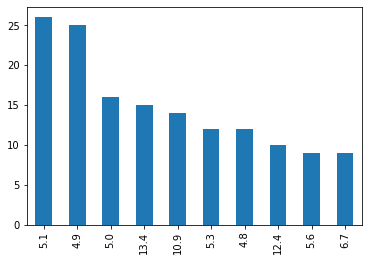

In [ ]:
bitcoin['price_bitcoin'].value_counts().head(10).plot.bar()

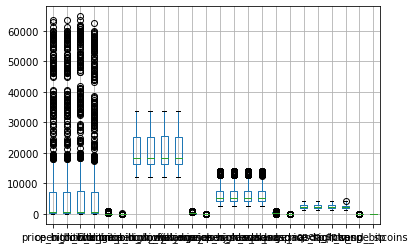

In [ ]:
bitcoin.plot.box(grid='True')

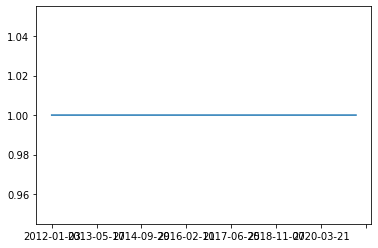

In [ ]:
bitcoin['Date'].value_counts().sort_index().plot.line()

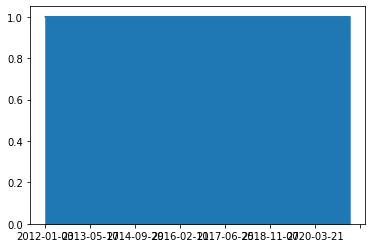

In [ ]:
bitcoin['Date'].value_counts().sort_index().plot.area()

##Bivariate

In [ ]:
bitcoin.columns =bitcoin.columns.get_level_values(0)
bitcoin.Date = pd.to_datetime(bitcoin.Date)
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              3390 non-null   datetime64[ns]
 1   price_bitcoin     3390 non-null   float64       
 2   open_bitcoin      3390 non-null   float64       
 3   high_bitcoin      3390 non-null   float64       
 4   low_bitcoin       3390 non-null   float64       
 5   vol_bitcoin       3390 non-null   float64       
 6   Change_bitcoin_%  3390 non-null   float64       
 7   price_dowjones    3390 non-null   float64       
 8   open_dowjones     3390 non-null   float64       
 9   high_dowjones     3390 non-null   float64       
 10  low_dowjones      3390 non-null   float64       
 11  vol_dowjones      3390 non-null   float64       
 12  change_dowjones   3390 non-null   float64       
 13  price_nasdaq      3390 non-null   float64       
 14  open_nasdaq       3390 n

In [ ]:
closing = bitcoin.loc[:,['Date','price_bitcoin','price_dowjones', 'price_nasdaq', 'price_sp']]
closing.head()

,Date,price_bitcoin,price_dowjones,price_nasdaq,price_sp
0,2021-04-14,62795.9,33874.69,13947.08,4141.84
1,2021-04-13,63540.9,33677.27,13996.10,4141.59
2,2021-04-12,59863.8,33745.40,13850.00,4127.99
3,2021-04-11,59978.7,33800.60,13900.18,4128.80
4,2021-04-10,59748.4,33800.60,13900.18,4128.80


In [ ]:
closing = closing.sort_index(ascending=False)
closing = closing.reset_index()
closing = closing.drop(columns=['index'])
closing.head()

,Date,price_bitcoin,price_dowjones,price_nasdaq,price_sp
0,2012-01-03,4.9,12397.38,2648.72,1277.06
1,2012-01-04,5.6,12418.42,2648.36,1277.30
2,2012-01-05,6.9,12415.70,2669.86,1281.06
3,2012-01-06,6.7,12359.92,2674.22,1277.81
4,2012-01-07,6.8,12359.92,2674.22,1277.81


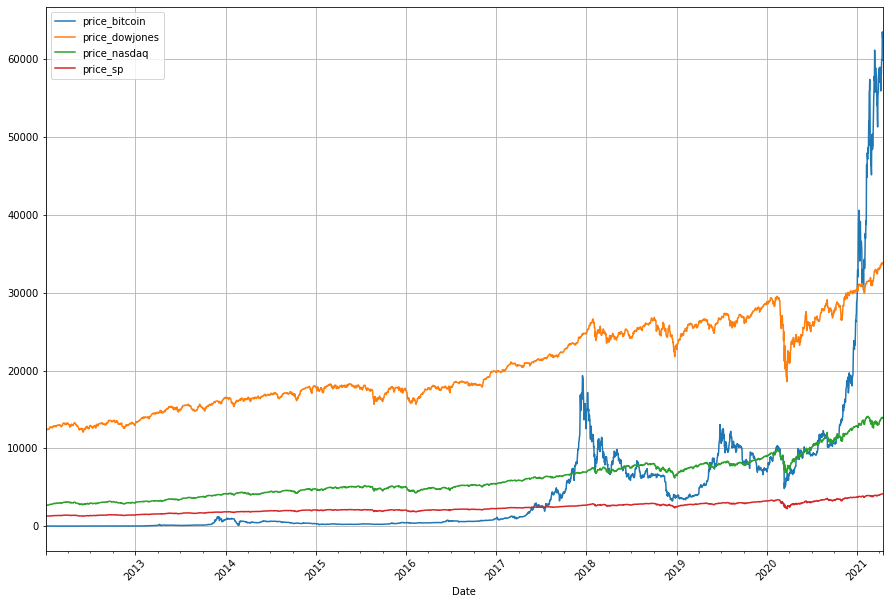

In [ ]:
closing.set_index('Date').plot(rot=45, grid=True, figsize=(15, 10))

The chart above shows the absolute closing prices.

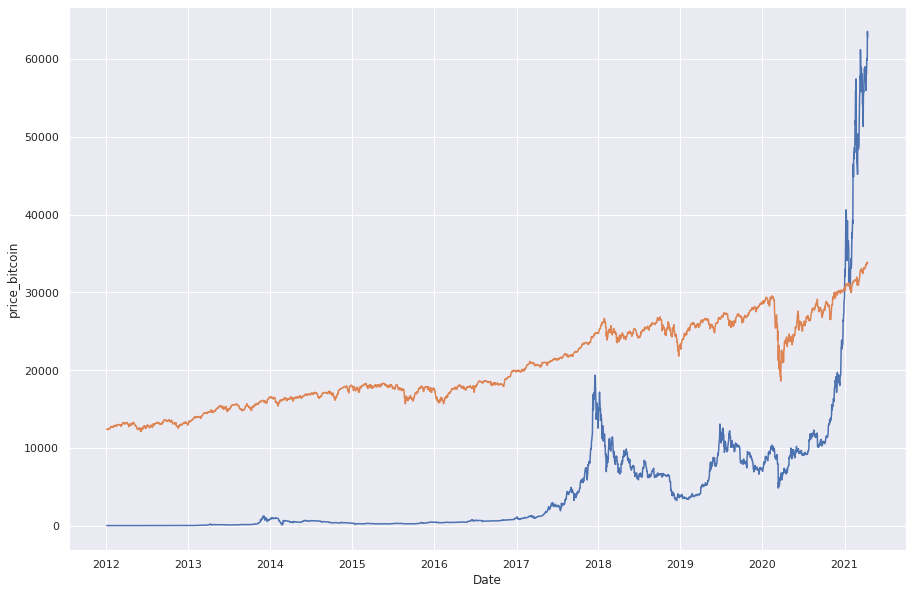

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})

sns.lineplot(x = "Date", y = "price_bitcoin", data = closing)
sns.lineplot(x = "Date", y = "price_dowjones", data = closing)

The trend seems to be relatively flat on Bitcoin abefore an explosion from 2017 to 2018. This is a significant point from which institutional investors saw an uptake in Bitcoin Investment. The DowJones price movement seems to be correlated to Bitcoin price movement from 2017 to 2021. However, the dips and rises in Bitcoin price seem steeper except in 2020 where the DowJones dipped more than Bitcoin.

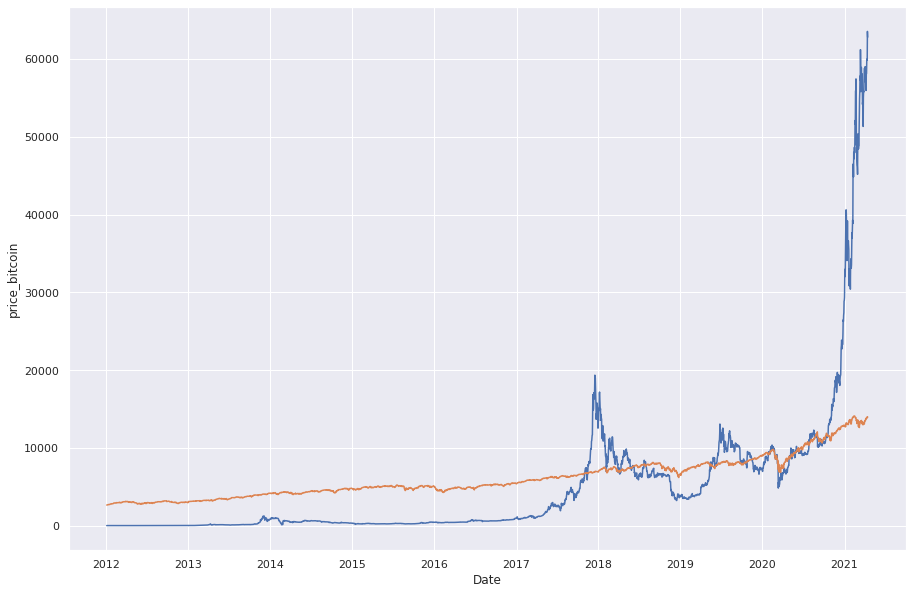

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})

sns.lineplot(x = "Date", y = "price_bitcoin", data = closing)
sns.lineplot(x = "Date", y = "price_nasdaq", data = closing)

The price movement of Nasdaq seems to be less correlated to the Bitcoin Price when compared to the DowJones price movement analyzed before.

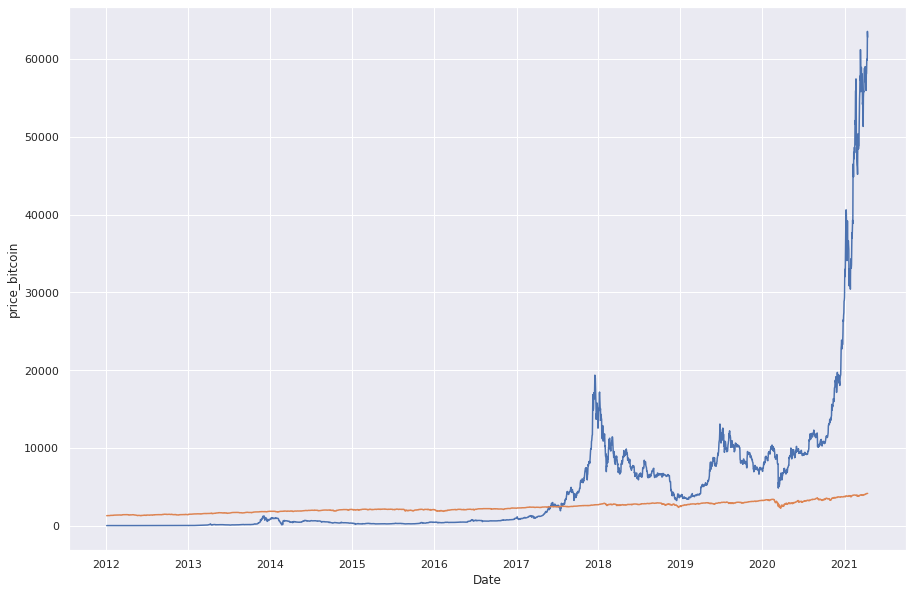

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})

sns.lineplot(x = "Date", y = "price_bitcoin", data = closing)
sns.lineplot(x = "Date", y = "price_sp", data = closing)

The price movement of S&P500 seems to be even less correlated to the Bitcoin Price when compared to the DowJones and Nasdaq price movements analyzed before.

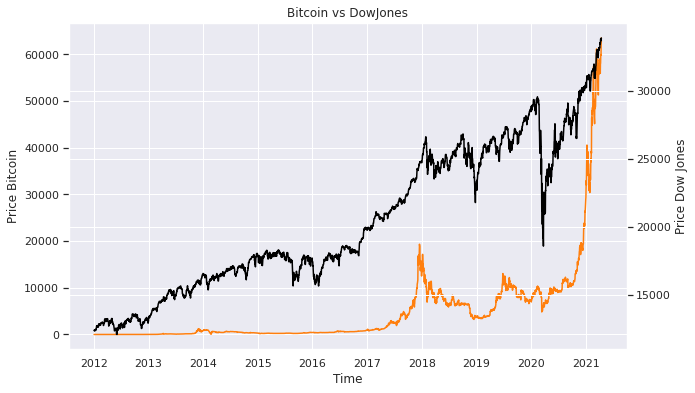

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
axb = ax.twinx()

ax.set_xlabel('Time')
ax.set_ylabel('Price Bitcoin')
ax.set_title('Bitcoin vs DowJones')
ax.grid(True)

# Plotting on the first y-axis
ax.plot(closing.Date, closing.price_bitcoin, color='tab:orange', label='Bitcoin')

# Plotting on the second y-axis
axb.set_ylabel('Price Dow Jones')
axb.plot(closing.Date, closing.price_dowjones, color='black', label='DowJones')

The correlation dicovered on the Dowjones plot before can be seen more clearly here when using 2 y axis. In between 2019 and 2020, the price movements seem to have decoupled as the price of DowJones went up, that of Bitcoin went down.

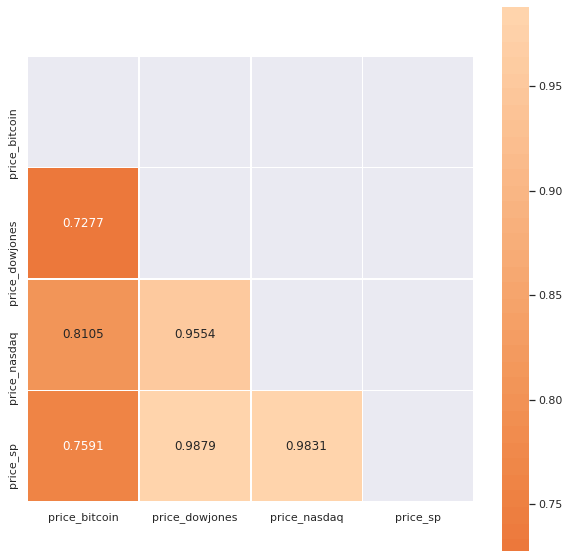

In [ ]:
# Compute the correlation matrix
corr = closing.iloc[:,1:].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt = '.4f', mask=mask, center=0, square=True, linewidths=.5)

The correlations discovered from the plots above seem to confirm the fact that the Bitcoin Price movement is strongly related to Dowjones, Nasdaq and S&P500 with all having a pearson correlation coefficient value greater than 0.7

In [ ]:
closing.head()

,Date,price_bitcoin,price_dowjones,price_nasdaq,price_sp
0,2012-01-03,4.9,12397.38,2648.72,1277.06
1,2012-01-04,5.6,12418.42,2648.36,1277.30
2,2012-01-05,6.9,12415.70,2669.86,1281.06
3,2012-01-06,6.7,12359.92,2674.22,1277.81
4,2012-01-07,6.8,12359.92,2674.22,1277.81


Absolute Values can be misleading due to differences in scale, it's therefore important to check the Relative Changes.

In [ ]:
# Relative Changes on a similar scale.

norm = closing.copy(deep=True)
norm.iloc[:,1:] = norm.iloc[:,1:].apply(lambda x: ((x-x.min())/ (x.max() - x.min())))
norm.head()

,Date,price_bitcoin,price_dowjones,price_nasdaq,price_sp
0,2012-01-03,0.000011,0.013591,0.000031,0.000000
1,2012-01-04,0.000022,0.014557,0.000000,0.000084
2,2012-01-05,0.000042,0.014432,0.001878,0.001396
3,2012-01-06,0.000039,0.011871,0.002259,0.000262
4,2012-01-07,0.000041,0.011871,0.002259,0.000262


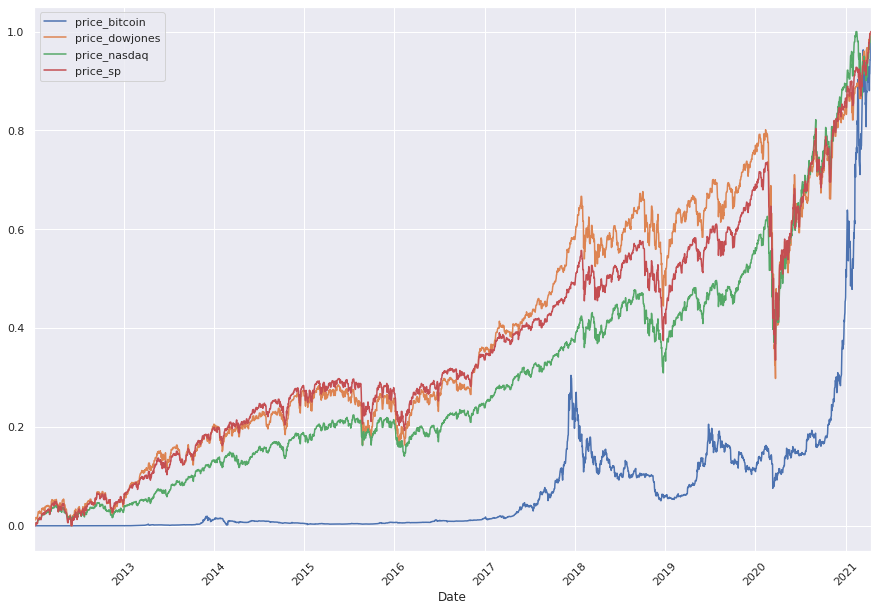

In [ ]:
norm.set_index('Date').plot(rot=45, grid=True, figsize=(15, 10))

All seem to be in a similar trend upwards.

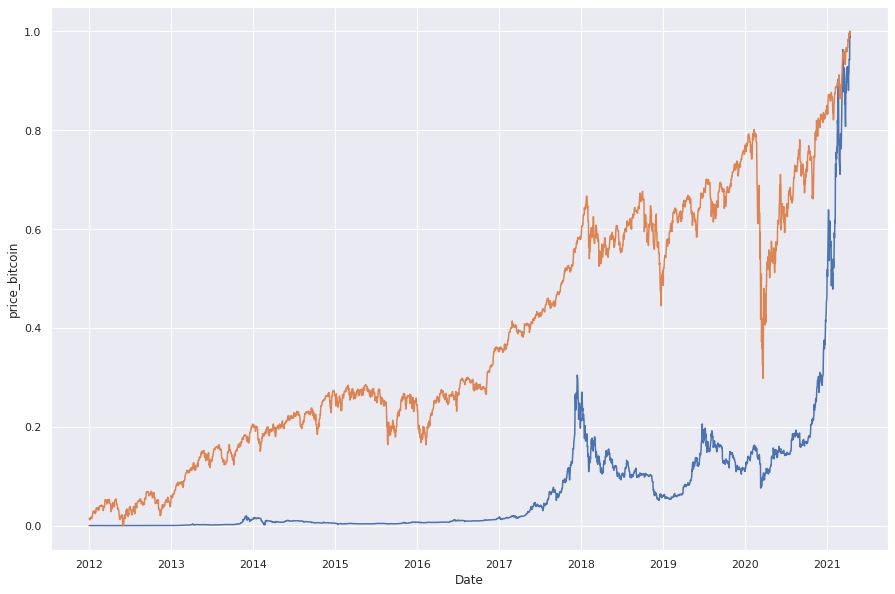

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})

sns.lineplot(x = "Date", y = "price_bitcoin", data = norm)
sns.lineplot(x = "Date", y = "price_dowjones", data = norm)

The correlation between Bitcoin Price movement and DowJones can be seen emphasized in the above plot.

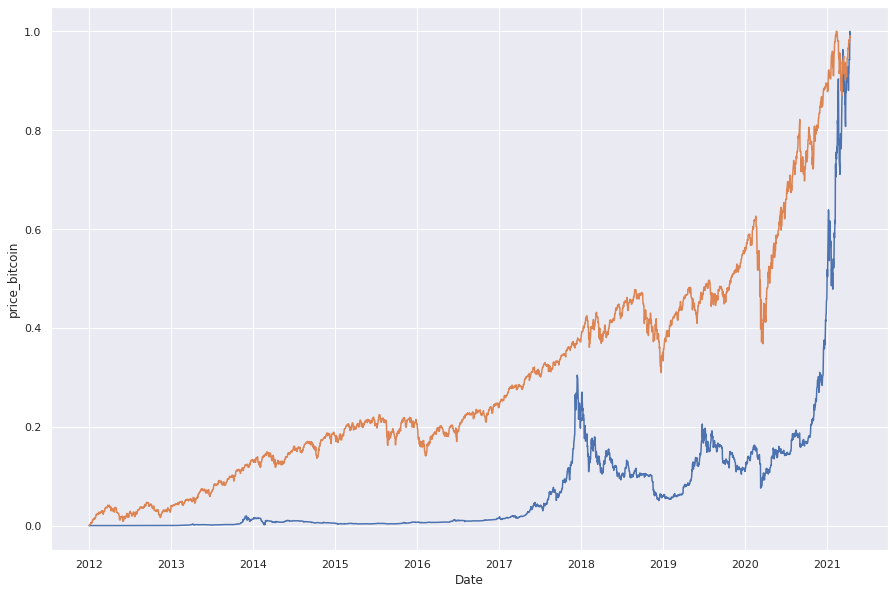

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})

sns.lineplot(x = "Date", y = "price_bitcoin", data = norm)
sns.lineplot(x = "Date", y = "price_nasdaq", data = norm)

The Nasdaq price correlation can be seen better here and is similar to the DowJones movement. The advantage of scaling the data can be seen as the relative relation shows the advantage compared to the absolute relation since the absolute relation didn't show this relation clearly.

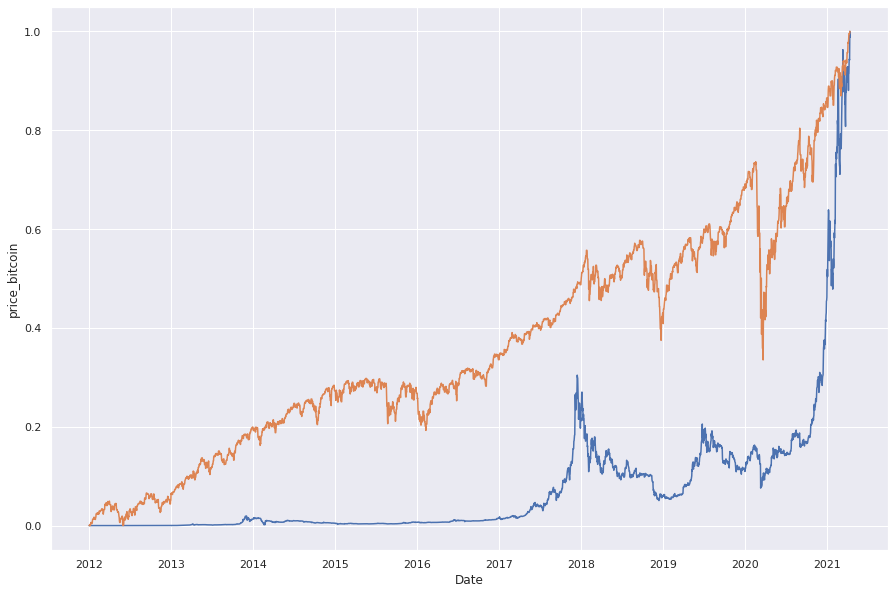

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})

sns.lineplot(x = "Date", y = "price_bitcoin", data = norm)
sns.lineplot(x = "Date", y = "price_sp", data = norm)

Similar to the Nasdaq plot. The S&P movement shows that it is more correlated than we thought when viewing the absolute relation plot.

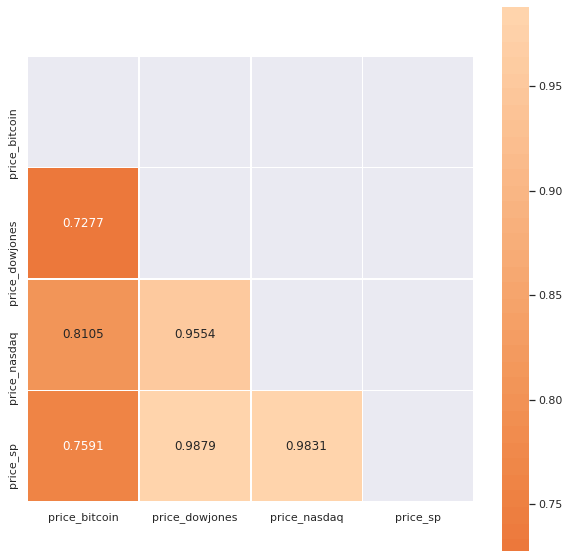

In [ ]:
# Compute the correlation matrix
corr = norm.iloc[:,1:].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt = '.4f', mask=mask, center=0, square=True, linewidths=.5)

The correlation matrix is the same as before.

In [ ]:
# Using log

df_log = closing.copy(deep= True)
df_log.iloc[:,1:] = df_log.iloc[:,1:].apply(lambda x: np.log(x) - np.log(x.shift(1))) 
df_log.head()

,Date,price_bitcoin,price_dowjones,price_nasdaq,price_sp
0,2012-01-03,NaN,NaN,NaN,NaN
1,2012-01-04,0.133531,0.001696,-0.000136,0.000188
2,2012-01-05,0.208755,-0.000219,0.008085,0.002939
3,2012-01-06,-0.029414,-0.004503,0.001632,-0.002540
4,2012-01-07,0.014815,0.000000,0.000000,0.000000


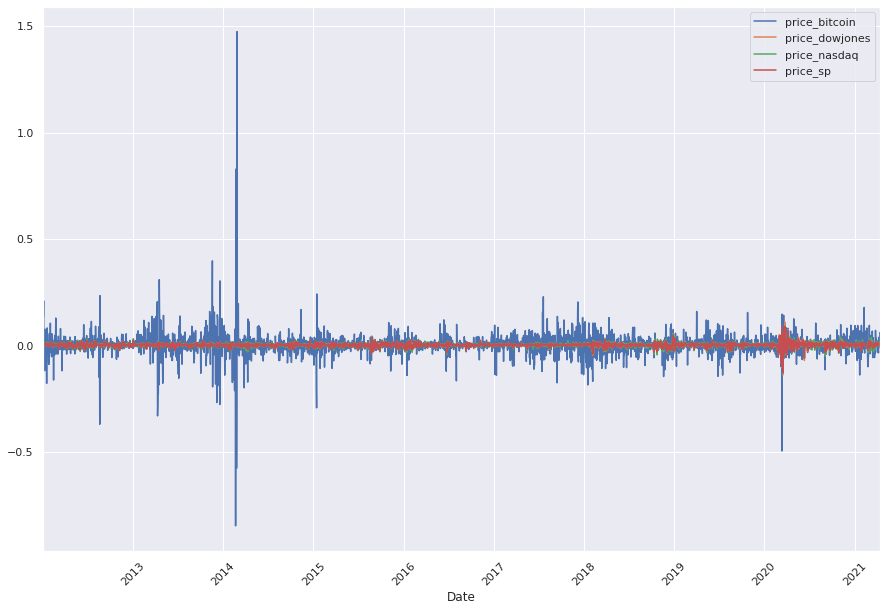

In [ ]:
df_log.set_index('Date').plot(rot=45, grid=True, figsize=(15, 10))

The log plot shows the frequencies of the different markets. Bitcoin Price Movement seems to be more exaggerated as compared to the other markets, showing its high volatility.

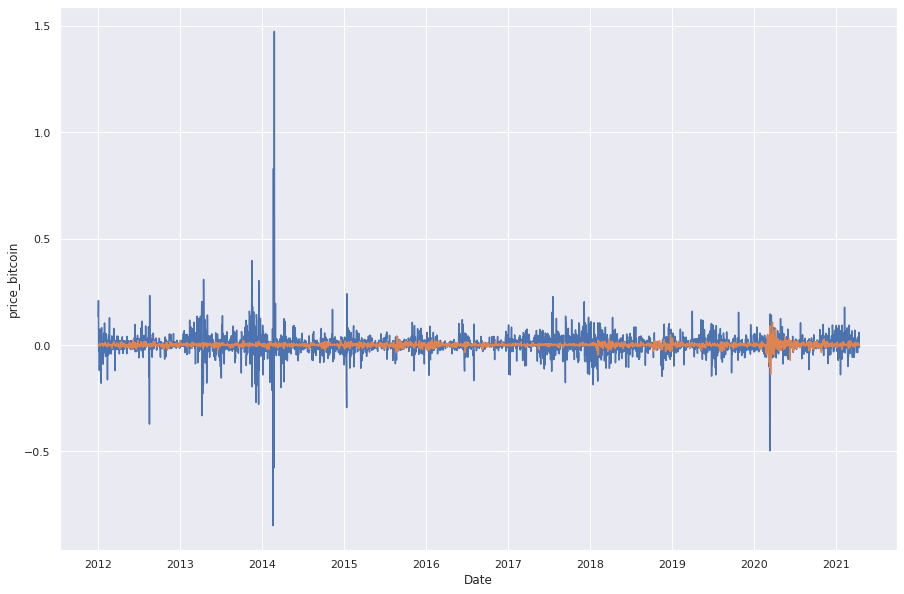

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})

sns.lineplot(x = "Date", y = "price_bitcoin", data = df_log)
sns.lineplot(x = "Date", y = "price_dowjones", data = df_log)

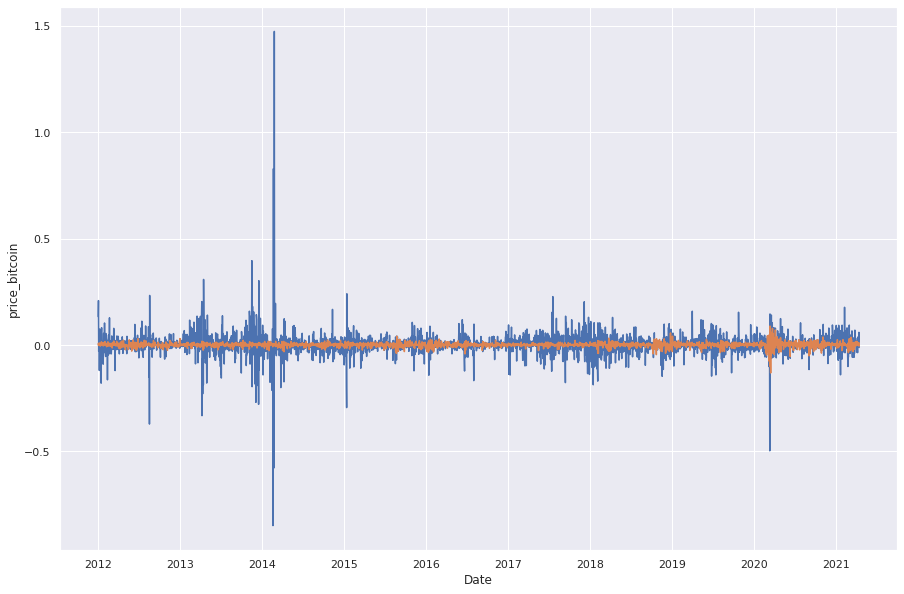

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})

sns.lineplot(x = "Date", y = "price_bitcoin", data = df_log)
sns.lineplot(x = "Date", y = "price_nasdaq", data = df_log)

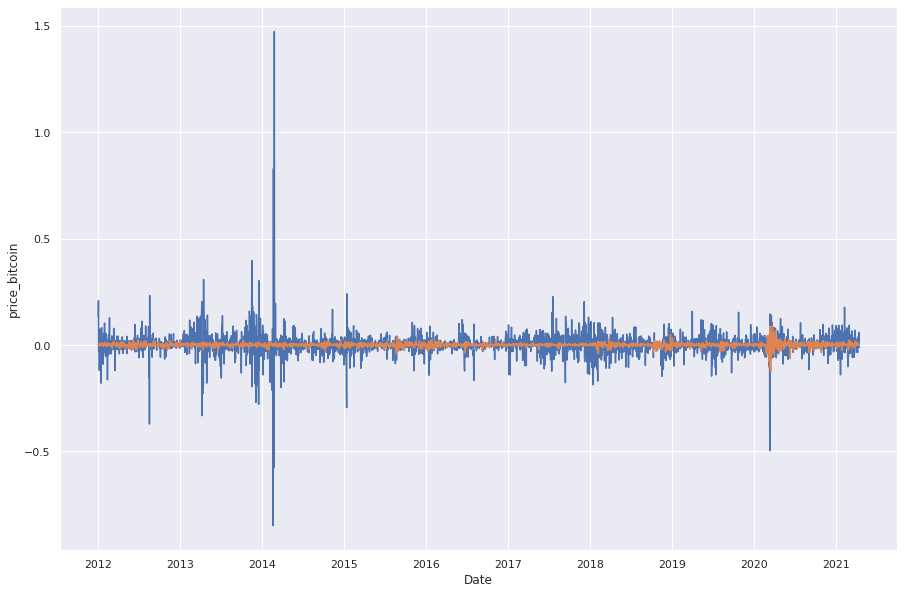

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})

sns.lineplot(x = "Date", y = "price_bitcoin", data = df_log)
sns.lineplot(x = "Date", y = "price_sp", data = df_log)

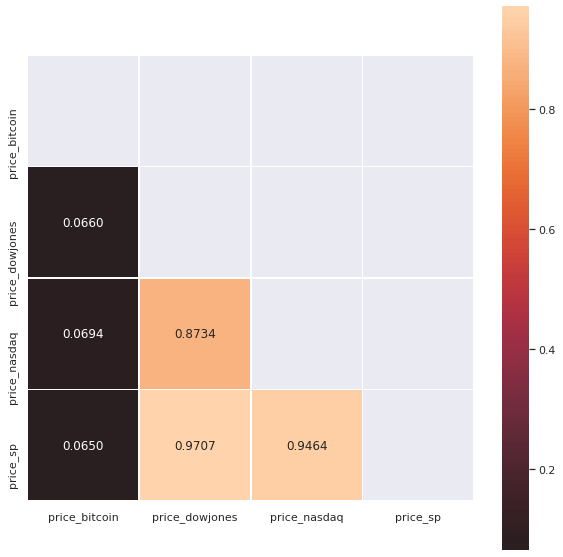

In [ ]:
# Compute the correlation matrix
corr = df_log.iloc[:,1:].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt = '.4f', mask=mask, center=0, square=True, linewidths=.5)

The log correlation provides an additional interesting insight. It shows that the price movement in the traditional markets i.e. Dowjones, Nasdaq and S&P500 are strongly correlated to each other in terms of frequency movement, however, they are all not correlated to that of Bitcoin. This means that the price change day to day in Bitcoin is different as compared to the traditional markets and could be due to the fact that Bitcoin Prices tend to move in larger values as compared to traditional markets due to its volatility.

##Multivariate

###a)PCA

Principal component analysis (PCA) is a statistical analysis that transforms a number of correlated variables into a smaller number of uncorrelated variables called principal components.

In [4]:
#Finding the best principal Components
from sklearn.decomposition import PCA

np.random.seed(0)


X = bitcoin.drop(['Unnamed: 0', 'Date'], axis=1)

#X = pd.get_dummies(X)

train_features = X

model = PCA(n_components=10).fit(train_features)

# number of components
n_pcs= model.components_.shape[0]
# get the index of the most important feature on EACH component
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = ['price_bitcoin', 'open_bitcoin', 'high_bitcoin',
       'low_bitcoin', 'vol_bitcoin', 'Change_bitcoin_%', 'price_dowjones',
       'open_dowjones', 'high_dowjones', 'low_dowjones', 'vol_dowjones',
       'change_dowjones', 'price_nasdaq', 'open_nasdaq', 'high_nasdaq',
       'low_nasdaq', 'vol_nasdaq', 'change_nasdaq', 'price_sp', 'open_sp',
       'high_sp', 'low_sp', 'change_sp', 'trend_bitcoins' ]
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}
# build the dataframe
df = pd.DataFrame(dic.items())
df

,0,1
0,PC0,high_bitcoin
1,PC1,high_dowjones
2,PC2,high_nasdaq
3,PC3,open_bitcoin
4,PC4,low_bitcoin
5,PC5,vol_nasdaq
6,PC6,vol_bitcoin
7,PC7,vol_dowjones
8,PC8,price_dowjones
9,PC9,high_bitcoin


###b)LDA

The aim of the method is to maximize the ratio of the between-group variance and the within-group variance. When the value of this ratio is at its maximum, then the samples within each group have the smallest possible scatter and the groups are separated from one another the most.

In [5]:
X = bitcoin.drop(['Unnamed: 0','Date','price_bitcoin'], axis=1)
y = bitcoin['price_bitcoin']
y=y.astype('int')
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

#standardise the data

#initialise it
lda = LDA()
lda_feat= lda.fit(X, y)
lda_feat = lda_feat.transform(X)

#show co-efficients of the columns
lda_feat

array([[ 2.23485665e+03,  3.82939668e+01, -1.32289122e+01, ...,
        -2.77633921e+00,  7.71941521e-02,  9.27610784e-01],
       [ 2.18636260e+03,  3.18049900e+01,  3.82000283e+01, ...,
        -5.43920218e-01,  1.24685806e+00,  1.94463238e+00],
       [ 2.11725574e+03,  3.42990867e+01, -9.61842781e+00, ...,
        -8.09097948e-01,  1.50374049e+00,  3.12079233e-01],
       ...,
       [-1.81268028e+02,  3.20292662e+00, -6.56860098e-01, ...,
        -1.71224575e-01,  5.06460780e-01,  1.72957169e-01],
       [-1.81420303e+02,  3.37974560e+00, -7.44860782e-01, ...,
        -1.20580459e+00, -2.74385856e-01, -7.41464902e-02],
       [-1.81815988e+02,  3.97724745e+00, -2.79574073e-01, ...,
         1.40192025e+00,  9.95879215e-01, -1.88042402e+00]])

In [6]:
feat_matters = pd.DataFrame(index=X.columns.values, data = lda_feat.T)
feat_matters.sort_values(0, ascending =False)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,3350,3351,3352,3353,3354,3355,3356,3357,3358,3359,3360,3361,3362,3363,3364,3365,3366,3367,3368,3369,3370,3371,3372,3373,3374,3375,3376,3377,3378,3379,3380,3381,3382,3383,3384,3385,3386,3387,3388,3389
open_bitcoin,2234.856651,2186.362603,2117.255743,2096.752130,2097.551820,2033.939401,1991.556900,1965.359143,2023.177026,2015.202223,2003.967354,2019.575531,2077.065025,2046.117353,2026.150521,2035.838265,1979.213915,1925.066948,1918.393556,1861.910610,1773.974682,1878.719397,1884.199516,1920.705502,1966.908802,2064.356137,2015.932209,2034.104324,1956.579228,1898.408126,1986.562551,2096.712549,2074.607906,1945.167705,1954.716613,1912.245313,1858.499448,1741.662830,1742.500511,1638.111693,...,-181.782231,-181.865842,-181.661939,-181.156468,-181.762154,-181.711943,-181.693755,-181.942583,-181.855653,-181.836086,-181.757920,-181.872589,-181.600687,-181.885161,-181.758529,-181.684389,-181.524957,-181.600188,-181.769176,-181.887754,-181.825281,-181.765309,-181.753965,-181.552646,-181.089318,-181.507548,-181.300863,-181.501322,-181.270973,-181.519857,-181.297939,-181.500085,-181.624220,-181.358972,-181.616204,-181.631715,-181.111059,-181.268028,-181.420303,-181.815988
high_bitcoin,38.293967,31.804990,34.299087,32.957118,28.916696,31.314278,29.405563,28.986722,31.705179,29.081574,29.892035,29.939413,32.477664,32.547979,28.353804,29.311118,25.714778,25.491991,23.734985,18.717876,20.502774,19.909041,23.117394,21.986724,22.914687,26.072079,23.262284,27.149371,19.058232,21.958095,21.366851,31.113643,23.332363,26.118427,24.143090,24.760220,23.205058,22.821785,15.715814,14.666744,...,3.740977,3.740915,3.636845,3.396324,3.300571,3.308346,3.239142,4.235034,3.667289,3.619009,2.956037,2.987232,3.440019,3.392183,3.088855,2.963874,2.905944,3.294719,3.523987,3.222755,3.321335,3.300757,3.187255,3.899510,3.839651,3.608445,3.907836,3.786408,3.522285,3.903349,3.999924,3.730216,3.871869,3.885802,3.517669,3.826605,3.357220,3.202927,3.379746,3.977247
price_nasdaq,4.371512,-2.433050,-0.853775,1.632975,0.264594,1.683597,-0.874780,-2.095975,-0.202223,-2.456148,-2.943689,-3.466152,-2.612459,-2.410660,1.261060,-0.797543,0.275990,0.808748,0.287633,-0.577841,1.180718,-1.138737,-1.299682,-0.389727,1.283407,2.079862,1.209088,2.148297,2.950876,1.295614,-1.911198,5.806150,3.437264,5.269251,-0.215230,7.789630,-3.263566,9.155756,-1.329148,-1.254999,...,-0.327416,-0.534707,-0.766431,-0.354271,-0.433221,-0.529012,0.098119,0.032881,0.027713,-0.965513,-0.675709,-1.219309,-0.172814,-0.114594,-0.011548,-0.184131,-0.684104,-0.696668,-0.637677,-0.846435,3.272412,3.408935,3.289250,0.385254,0.432028,0.758577,-0.277382,-0.462613,-0.288566,-0.367798,-0.373596,-0.081465,-1.341606,0.344470,-0.137161,-0.194511,0.141925,-0.431486,0.754585,0.229277
high_nasdaq,3.700895,2.872676,2.287542,2.971891,3.768022,2.620489,2.004790,0.907720,3.098378,1.246895,1.431063,1.928556,1.549174,1.359938,-0.636499,3.484959,-0.341982,-0.082389,0.195039,0.600059,0.727371,0.801976,-0.955014,0.296683,-4.380426,-4.078234,-3.852709,-1.222578,3.101848,1.099268,-0.730226,0.521898,1.508384,-0.058304,-2.023154,4.262479,-5.581167,3.934357,-0.430401,-1.428787,...,0.041299,0.074736,0.415574,0.086004,0.239242,-0.386662,0.151496,2.316582,1.063085,0.462531,-0.797293,-0.071476,1.070825,0.673337,0.001516,-0.153198,-0.452843,0.254959,0.681619,0.468088,1.172687,1.101099,0.894968,0.293664,0.837673,-0.946654,0.159939,-0.169128,-0.702243,0.056972,0.357978,-0.260136,-0.690485,0.403124,-0.245641,0.493669,-0.407743,-0.988619,-0.121912,-0.050474
open_nasdaq,3.417947,1.184030,1.127326,-0.562446,-1.035215,-0.535922,3.017852,1.577333,0.671323,0.507716,1.644232,1.918840,1.618318,1.823735,-3.848933,-2.597811,2.766445,-2.716074,-2.903161,-3.536395,6.215619,-1.364501,1.254420,2.138104,-0.275740,-0.954706,-0.784075,-0.560010,-5.979485,-2.023451,1.250558,0.049998,-0.801270,0.304991,-2.167881,3.383787,-7.239039,2.444708,-4.727042,

# Feature Engineering

### Moving Averages

In [ ]:
bitcoin = bitcoin.drop(columns=["Unnamed: 0"])
bitcoin.Date = pd.to_datetime(bitcoin.Date)
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              3390 non-null   datetime64[ns]
 1   price_bitcoin     3390 non-null   float64       
 2   open_bitcoin      3390 non-null   float64       
 3   high_bitcoin      3390 non-null   float64       
 4   low_bitcoin       3390 non-null   float64       
 5   vol_bitcoin       3390 non-null   float64       
 6   Change_bitcoin_%  3390 non-null   float64       
 7   price_dowjones    3390 non-null   float64       
 8   open_dowjones     3390 non-null   float64       
 9   high_dowjones     3390 non-null   float64       
 10  low_dowjones      3390 non-null   float64       
 11  vol_dowjones      3390 non-null   float64       
 12  change_dowjones   3390 non-null   float64       
 13  price_nasdaq      3390 non-null   float64       
 14  open_nasdaq       3390 n

In [ ]:
bitcoin = bitcoin.sort_index(ascending=False)
bitcoin = bitcoin.reset_index()
bitcoin = bitcoin.drop(columns=['index'])
bitcoin.head()

,Date,price_bitcoin,open_bitcoin,high_bitcoin,low_bitcoin,vol_bitcoin,Change_bitcoin_%,price_dowjones,open_dowjones,high_dowjones,low_dowjones,vol_dowjones,change_dowjones,price_nasdaq,open_nasdaq,high_nasdaq,low_nasdaq,vol_nasdaq,change_nasdaq,price_sp,open_sp,high_sp,low_sp,change_sp,trend_bitcoins
0,2012-01-03,4.9,5.2,5.3,4.7,125.17,6.51,12397.38,12221.19,12479.65,12221.19,152.56,1.47,2648.72,2657.39,2665.90,2641.98,411.79,1.67,1277.06,1258.86,1284.62,1258.86,1.55,38.0
1,2012-01-04,5.6,4.9,5.7,4.8,131.17,14.14,12418.42,12392.46,12430.00,12337.25,145.13,0.17,2648.36,2639.90,2653.18,2627.23,411.09,0.01,1277.30,1277.03,1278.73,1268.10,0.02,18.0
2,2012-01-05,6.9,5.6,7.2,5.6,182.33,24.78,12415.70,12418.42,12435.98,12283.90,158.44,0.02,2669.86,2642.57,2673.56,2631.23,442.08,0.81,1281.06,1277.30,1283.05,1265.26,0.29,25.0
3,2012-01-06,6.7,6.9,7.2,6.1,218.08,3.60,12359.92,12407.45,12415.24,12332.41,131.12,0.45,2674.22,2671.17,2682.12,2658.83,412.31,0.16,1277.81,1280.93,1281.84,1273.34,0.25,7.0
4,2012-01-07,6.8,6.7,7.0,6.4,48.39,1.64,12359.92,12407.45,12415.24,12332.41,131.12,0.45,2674.22,2671.17,2682.12,2658.83,412.31,0.16,1277.81,1280.93,1281.84,1273.34,0.25,30.0


In [ ]:
# We compute the simple moving average over a period of 10 and 20 years (size of the window), 
# selecting in all cases a minimum number of periods of 1. 
# As shown below, we add the moving averages to the existing data frames

sma_7days = 7
sma_25days = 25
sma_50days = 50
sma_200days = 200

bitcoin['SMA_7'] = bitcoin.price_bitcoin.rolling(sma_7days, min_periods=1).mean()
bitcoin['SMA_25'] = bitcoin.price_bitcoin.rolling(sma_25days, min_periods=1).mean()
bitcoin['SMA_50'] = bitcoin.price_bitcoin.rolling(sma_50days, min_periods=1).mean()
bitcoin['SMA_200'] = bitcoin.price_bitcoin.rolling(sma_200days, min_periods=1).mean()
bitcoin.head()

,Date,price_bitcoin,open_bitcoin,high_bitcoin,low_bitcoin,vol_bitcoin,Change_bitcoin_%,price_dowjones,open_dowjones,high_dowjones,low_dowjones,vol_dowjones,change_dowjones,price_nasdaq,open_nasdaq,high_nasdaq,low_nasdaq,vol_nasdaq,change_nasdaq,price_sp,open_sp,high_sp,low_sp,change_sp,trend_bitcoins,SMA_7,SMA_25,SMA_50,SMA_200
0,2012-01-03,4.9,5.2,5.3,4.7,125.17,6.51,12397.38,12221.19,12479.65,12221.19,152.56,1.47,2648.72,2657.39,2665.90,2641.98,411.79,1.67,1277.06,1258.86,1284.62,1258.86,1.55,38.0,4.900,4.900,4.900,4.900
1,2012-01-04,5.6,4.9,5.7,4.8,131.17,14.14,12418.42,12392.46,12430.00,12337.25,145.13,0.17,2648.36,2639.90,2653.18,2627.23,411.09,0.01,1277.30,1277.03,1278.73,1268.10,0.02,18.0,5.250,5.250,5.250,5.250
2,2012-01-05,6.9,5.6,7.2,5.6,182.33,24.78,12415.70,12418.42,12435.98,12283.90,158.44,0.02,2669.86,2642.57,2673.56,2631.23,442.08,0.81,1281.06,1277.30,1283.05,1265.26,0.29,25.0,5.800,5.800,5.800,5.800
3,2012-01-06,6.7,6.9,7.2,6.1,218.08,3.60,12359.92,12407.45,12415.24,12332.41,131.12,0.45,2674.22,2671.17,2682.12,2658.83,412.31,0.16,1277.81,1280.93,1281.84,1273.34,0.25,7.0,6.025,6.025,6.025,6.025
4,2012-01-07,6.8,6.7,7.0,6.4,48.39,1.64,12359.92,12407.45,12415.24,12332.41,131.12,0.45,2674.22,2671.17,2682.12,2658.83,412.31,0.16,1277.81,1280.93,1281.84,1273.34,0.25,30.0,6.180,6.180,6.180,6.180


### STATISTICAL INFORMATION OVER MOVING WINDOWS

In [ ]:
# Rolling Minimum

bitcoin['Min_7'] = bitcoin.price_bitcoin.rolling(sma_7days, min_periods=1).min()
bitcoin['Min_25'] = bitcoin.price_bitcoin.rolling(sma_25days, min_periods=1).min()
bitcoin['Min_50'] = bitcoin.price_bitcoin.rolling(sma_50days, min_periods=1).min()
bitcoin['Min_200'] = bitcoin.price_bitcoin.rolling(sma_200days, min_periods=1).min()
bitcoin.tail()

,Date,price_bitcoin,open_bitcoin,high_bitcoin,low_bitcoin,vol_bitcoin,Change_bitcoin_%,price_dowjones,open_dowjones,high_dowjones,low_dowjones,vol_dowjones,change_dowjones,price_nasdaq,open_nasdaq,high_nasdaq,low_nasdaq,vol_nasdaq,change_nasdaq,price_sp,open_sp,high_sp,low_sp,change_sp,trend_bitcoins,SMA_7,SMA_25,SMA_50,SMA_200,Min_7,Min_25,Min_50,Min_200
3385,2021-04-10,59748.4,58127.4,61229.0,57900.0,103.72,2.80,33800.60,33526.19,33810.87,33526.19,317.82,0.89,13900.18,13787.01,13905.41,13748.35,785.76,0.51,4128.80,4096.11,4129.48,4095.51,0.77,46.0,58154.685714,57041.876,54665.388,31456.3905,55948.7,51322.3,45164.0,10237.3
3386,2021-04-11,59978.7,59772.4,60667.1,59250.3,58.20,0.39,33800.60,33526.19,33810.87,33526.19,317.82,0.89,13900.18,13787.01,13905.41,13748.35,785.76,0.51,4128.80,4096.11,4129.48,4095.51,0.77,45.0,58408.800000,57084.484,54746.488,31705.0975,55948.7,51322.3,45164.0,10544.2
3387,2021-04-12,59863.8,59982.1,61259.9,59569.2,81.88,0.19,33745.40,33775.06,33786.19,33665.54,329.02,0.16,13850.00,13854.44,13877.00,13783.95,894.01,0.36,4127.99,4124.71,4131.76,4114.82,0.02,45.0,58533.142857,57172.796,54795.088,31950.7195,55948.7,51322.3,45164.0,10544.2
3388,2021-04-13,63540.9,59863.6,63659.0,59839.4,126.56,6.14,33677.27,33721.16,33741.64,33545.84,330.00,0.20,13996.10,13902.45,14011.51,13902.45,839.45,1.05,4141.59,4130.10,4148.00,4124.43,0.33,45.0,59325.228571,57390.912,54983.670,32214.9800,55948.7,51322.3,45164.0,10544.2
3389,2021-04-14,62795.9,63544.2,64778.0,62557.4,116.57,1.17,33874.69,33668.95,33910.59,33668.95,175.46,0.59,13947.08,14004.07,14033.63,13928.49,439.56,0.35,4141.84,4140.40,4151.97,4138.20,0.01,45.0,60303.400000,57579.012,55261.364,32475.3200,58077.4,51322.3,45164.0,10544.2


In [ ]:
# Rolling Maximum

bitcoin['Max_7'] = bitcoin.price_bitcoin.rolling(sma_7days, min_periods=1).max()
bitcoin['Max_25'] = bitcoin.price_bitcoin.rolling(sma_25days, min_periods=1).max()
bitcoin['Max_50'] = bitcoin.price_bitcoin.rolling(sma_50days, min_periods=1).max()
bitcoin['Max_200'] = bitcoin.price_bitcoin.rolling(sma_200days, min_periods=1).max()
bitcoin.tail()

,Date,price_bitcoin,open_bitcoin,high_bitcoin,low_bitcoin,vol_bitcoin,Change_bitcoin_%,price_dowjones,open_dowjones,high_dowjones,low_dowjones,vol_dowjones,change_dowjones,price_nasdaq,open_nasdaq,high_nasdaq,low_nasdaq,vol_nasdaq,change_nasdaq,price_sp,open_sp,high_sp,low_sp,change_sp,trend_bitcoins,SMA_7,SMA_25,SMA_50,SMA_200,Min_7,Min_25,Min_50,Min_200,Max_7,Max_25,Max_50,Max_200
3385,2021-04-10,59748.4,58127.4,61229.0,57900.0,103.72,2.80,33800.60,33526.19,33810.87,33526.19,317.82,0.89,13900.18,13787.01,13905.41,13748.35,785.76,0.51,4128.80,4096.11,4129.48,4095.51,0.77,46.0,58154.685714,57041.876,54665.388,31456.3905,55948.7,51322.3,45164.0,10237.3,59748.4,59748.4,61195.3,61195.3
3386,2021-04-11,59978.7,59772.4,60667.1,59250.3,58.20,0.39,33800.60,33526.19,33810.87,33526.19,317.82,0.89,13900.18,13787.01,13905.41,13748.35,785.76,0.51,4128.80,4096.11,4129.48,4095.51,0.77,45.0,58408.800000,57084.484,54746.488,31705.0975,55948.7,51322.3,45164.0,10544.2,59978.7,59978.7,61195.3,61195.3
3387,2021-04-12,59863.8,59982.1,61259.9,59569.2,81.88,0.19,33745.40,33775.06,33786.19,33665.54,329.02,0.16,13850.00,13854.44,13877.00,13783.95,894.01,0.36,4127.99,4124.71,4131.76,4114.82,0.02,45.0,58533.142857,57172.796,54795.088,31950.7195,55948.7,51322.3,45164.0,10544.2,59978.7,59978.7,61195.3,61195.3
3388,2021-04-13,63540.9,59863.6,63659.0,59839.4,126.56,6.14,33677.27,33721.16,33741.64,33545.84,330.00,0.20,13996.10,13902.45,14011.51,13902.45,839.45,1.05,4141.59,4130.10,4148.00,4124.43,0.33,45.0,59325.228571,57390.912,54983.670,32214.9800,55948.7,51322.3,45164.0,10544.2,63540.9,63540.9,63540.9,63540.9
3389,2021-04-14,62795.9,63544.2,64778.0,62557.4,116.57,1.17,33874.69,33668.95,33910.59,33668.95,175.46,0.59,13947.08,14004.07,14033.63,13928.49,439.56,0.35,4141.84,4140.40,4151.97,4138.20,0.01,45.0,60303.400000,57579.012,55261.364,32475.3200,58077.4,51322.3,45164.0,10544.2,63540.9,63540.9,63540.9,63540.9


In [ ]:
# Rolling Median

bitcoin['Median_7'] = bitcoin.price_bitcoin.rolling(sma_7days, min_periods=1).median()
bitcoin['Median_25'] = bitcoin.price_bitcoin.rolling(sma_25days, min_periods=1).median()
bitcoin['Median_50'] = bitcoin.price_bitcoin.rolling(sma_50days, min_periods=1).median()
bitcoin['Median_200'] = bitcoin.price_bitcoin.rolling(sma_200days, min_periods=1).median()
bitcoin.tail()

,Date,price_bitcoin,open_bitcoin,high_bitcoin,low_bitcoin,vol_bitcoin,Change_bitcoin_%,price_dowjones,open_dowjones,high_dowjones,low_dowjones,vol_dowjones,change_dowjones,price_nasdaq,open_nasdaq,high_nasdaq,low_nasdaq,vol_nasdaq,change_nasdaq,price_sp,open_sp,high_sp,low_sp,change_sp,trend_bitcoins,SMA_7,SMA_25,SMA_50,SMA_200,Min_7,Min_25,Min_50,Min_200,Max_7,Max_25,Max_50,Max_200,Median_7,Median_25,Median_50,Median_200
3385,2021-04-10,59748.4,58127.4,61229.0,57900.0,103.72,2.80,33800.60,33526.19,33810.87,33526.19,317.82,0.89,13900.18,13787.01,13905.41,13748.35,785.76,0.51,4128.80,4096.11,4129.48,4095.51,0.77,46.0,58154.685714,57041.876,54665.388,31456.3905,55948.7,51322.3,45164.0,10237.3,59748.4,59748.4,61195.3,61195.3,58118.7,57996.3,55893.3,29154.65
3386,2021-04-11,59978.7,59772.4,60667.1,59250.3,58.20,0.39,33800.60,33526.19,33810.87,33526.19,317.82,0.89,13900.18,13787.01,13905.41,13748.35,785.76,0.51,4128.80,4096.11,4129.48,4095.51,0.77,45.0,58408.800000,57084.484,54746.488,31705.0975,55948.7,51322.3,45164.0,10544.2,59978.7,59978.7,61195.3,61195.3,58118.7,57996.3,55905.8,29881.95
3387,2021-04-12,59863.8,59982.1,61259.9,59569.2,81.88,0.19,33745.40,33775.06,33786.19,33665.54,329.02,0.16,13850.00,13854.44,13877.00,13783.95,894.01,0.36,4127.99,4124.71,4131.76,4114.82,0.02,45.0,58533.142857,57172.796,54795.088,31950.7195,55948.7,51322.3,45164.0,10544.2,59978.7,59978.7,61195.3,61195.3,58118.7,58077.4,55905.8,30623.05
3388,2021-04-13,63540.9,59863.6,63659.0,59839.4,126.56,6.14,33677.27,33721.16,33741.64,33545.84,330.00,0.20,13996.10,13902.45,14011.51,13902.45,839.45,1.05,4141.59,4130.10,4148.00,4124.43,0.33,45.0,59325.228571,57390.912,54983.670,32214.9800,55948.7,51322.3,45164.0,10544.2,63540.9,63540.9,63540.9,63540.9,59748.4,58077.4,56419.2,31432.35
3389,2021-04-14,62795.9,63544.2,64778.0,62557.4,116.57,1.17,33874.69,33668.95,33910.59,33668.95,175.46,0.59,13947.08,14004.07,14033.63,13928.49,439.56,0.35,4141.84,4140.40,4151.97,4138.20,0.01,45.0,60303.400000,57579.012,55261.364,32475.3200,58077.4,51322.3,45164.0,10544.2,63540.9,63540.9,63540.9,63540.9,59863.8,58077.4,56974.8,32055.75


In [ ]:
# Rolling Deviation

bitcoin['Deviation_7'] = bitcoin.price_bitcoin.rolling(sma_7days, min_periods=1).std()
bitcoin['Deviation_25'] = bitcoin.price_bitcoin.rolling(sma_25days, min_periods=1).std()
bitcoin['Deviation_50'] = bitcoin.price_bitcoin.rolling(sma_50days, min_periods=1).std()
bitcoin['Deviation_200'] = bitcoin.price_bitcoin.rolling(sma_200days, min_periods=1).std()
bitcoin.tail()

,Date,price_bitcoin,open_bitcoin,high_bitcoin,low_bitcoin,vol_bitcoin,Change_bitcoin_%,price_dowjones,open_dowjones,high_dowjones,low_dowjones,vol_dowjones,change_dowjones,price_nasdaq,open_nasdaq,high_nasdaq,low_nasdaq,vol_nasdaq,change_nasdaq,price_sp,open_sp,high_sp,low_sp,change_sp,trend_bitcoins,SMA_7,SMA_25,SMA_50,SMA_200,Min_7,Min_25,Min_50,Min_200,Max_7,Max_25,Max_50,Max_200,Median_7,Median_25,Median_50,Median_200,Deviation_7,Deviation_25,Deviation_50,Deviation_200
3385,2021-04-10,59748.4,58127.4,61229.0,57900.0,103.72,2.80,33800.60,33526.19,33810.87,33526.19,317.82,0.89,13900.18,13787.01,13905.41,13748.35,785.76,0.51,4128.80,4096.11,4129.48,4095.51,0.77,46.0,58154.685714,57041.876,54665.388,31456.3905,55948.7,51322.3,45164.0,10237.3,59748.4,59748.4,61195.3,61195.3,58118.7,57996.3,55893.3,29154.65,1165.056384,2168.652524,4307.870682,17005.379639
3386,2021-04-11,59978.7,59772.4,60667.1,59250.3,58.20,0.39,33800.60,33526.19,33810.87,33526.19,317.82,0.89,13900.18,13787.01,13905.41,13748.35,785.76,0.51,4128.80,4096.11,4129.48,4095.51,0.77,45.0,58408.800000,57084.484,54746.488,31705.0975,55948.7,51322.3,45164.0,10544.2,59978.7,59978.7,61195.3,61195.3,58118.7,57996.3,55905.8,29881.95,1355.058643,2216.884669,4369.768162,17057.146883
3387,2021-04-12,59863.8,59982.1,61259.9,59569.2,81.88,0.19,33745.40,33775.06,33786.19,33665.54,329.02,0.16,13850.00,13854.44,13877.00,13783.95,894.01,0.36,4127.99,4124.71,4131.76,4114.82,0.02,45.0,58533.142857,57172.796,54795.088,31950.7195,55948.7,51322.3,45164.0,10544.2,59978.7,59978.7,61195.3,61195.3,58118.7,58077.4,55905.8,30623.05,1453.968327,2283.572265,4413.559704,17107.345350
3388,2021-04-13,63540.9,59863.6,63659.0,59839.4,126.56,6.14,33677.27,33721.16,33741.64,33545.84,330.00,0.20,13996.10,13902.45,14011.51,13902.45,839.45,1.05,4141.59,4130.10,4148.00,4124.43,0.33,45.0,59325.228571,57390.912,54983.670,32214.9800,55948.7,51322.3,45164.0,10544.2,63540.9,63540.9,63540.9,63540.9,59748.4,58077.4,56419.2,31432.35,2348.111875,2611.502125,4581.997026,17185.288683
3389,2021-04-14,62795.9,63544.2,64778.0,62557.4,116.57,1.17,33874.69,33668.95,33910.59,33668.95,175.46,0.59,13947.08,14004.07,14033.63,13928.49,439.56,0.35,4141.84,4140.40,4151.97,4138.20,0.01,45.0,60303.400000,57579.012,55261.364,32475.3200,58077.4,51322.3,45164.0,10544.2,63540.9,63540.9,63540.9,63540.9,59863.8,58077.4,56974.8,32055.75,2122.445753,2824.848860,4626.984931,17252.403220


In [ ]:
# Rolling Variance

bitcoin['Variance_7'] = bitcoin.price_bitcoin.rolling(sma_7days, min_periods=1).var()
bitcoin['Variance_25'] = bitcoin.price_bitcoin.rolling(sma_25days, min_periods=1).var()
bitcoin['Variance_50'] = bitcoin.price_bitcoin.rolling(sma_50days, min_periods=1).var()
bitcoin['Variance_200'] = bitcoin.price_bitcoin.rolling(sma_200days, min_periods=1).var()
bitcoin.tail()

,Date,price_bitcoin,open_bitcoin,high_bitcoin,low_bitcoin,vol_bitcoin,Change_bitcoin_%,price_dowjones,open_dowjones,high_dowjones,low_dowjones,vol_dowjones,change_dowjones,price_nasdaq,open_nasdaq,high_nasdaq,low_nasdaq,vol_nasdaq,change_nasdaq,price_sp,open_sp,high_sp,low_sp,change_sp,trend_bitcoins,SMA_7,SMA_25,SMA_50,SMA_200,Min_7,Min_25,Min_50,Min_200,Max_7,Max_25,Max_50,Max_200,Median_7,Median_25,Median_50,Median_200,Deviation_7,Deviation_25,Deviation_50,Deviation_200,Variance_7,Variance_25,Variance_50,Variance_200
3385,2021-04-10,59748.4,58127.4,61229.0,57900.0,103.72,2.80,33800.60,33526.19,33810.87,33526.19,317.82,0.89,13900.18,13787.01,13905.41,13748.35,785.76,0.51,4128.80,4096.11,4129.48,4095.51,0.77,46.0,58154.685714,57041.876,54665.388,31456.3905,55948.7,51322.3,45164.0,10237.3,59748.4,59748.4,61195.3,61195.3,58118.7,57996.3,55893.3,29154.65,1165.056384,2168.652524,4307.870682,17005.379639,1.357356e+06,4.703054e+06,1.855775e+07,2.891829e+08
3386,2021-04-11,59978.7,59772.4,60667.1,59250.3,58.20,0.39,33800.60,33526.19,33810.87,33526.19,317.82,0.89,13900.18,13787.01,13905.41,13748.35,785.76,0.51,4128.80,4096.11,4129.48,4095.51,0.77,45.0,58408.800000,57084.484,54746.488,31705.0975,55948.7,51322.3,45164.0,10544.2,59978.7,59978.7,61195.3,61195.3,58118.7,57996.3,55905.8,29881.95,1355.058643,2216.884669,4369.768162,17057.146883,1.836184e+06,4.914578e+06,1.909487e+07,2.909463e+08
3387,2021-04-12,59863.8,59982.1,61259.9,59569.2,81.88,0.19,33745.40,33775.06,33786.19,33665.54,329.02,0.16,13850.00,13854.44,13877.00,13783.95,894.01,0.36,4127.99,4124.71,4131.76,4114.82,0.02,45.0,58533.142857,57172.796,54795.088,31950.7195,55948.7,51322.3,45164.0,10544.2,59978.7,59978.7,61195.3,61195.3,58118.7,58077.4,55905.8,30623.05,1453.968327,2283.572265,4413.559704,17107.345350,2.114024e+06,5.214702e+06,1.947951e+07,2.926613e+08
3388,2021-04-13,63540.9,59863.6,63659.0,59839.4,126.56,6.14,33677.27,33721.16,33741.64,33545.84,330.00,0.20,13996.10,13902.45,14011.51,13902.45,839.45,1.05,4141.59,4130.10,4148.00,4124.43,0.33,45.0,59325.228571,57390.912,54983.670,32214.9800,55948.7,51322.3,45164.0,10544.2,63540.9,63540.9,63540.9,63540.9,59748.4,58077.4,56419.2,31432.35,2348.111875,2611.502125,4581.997026,17185.288683,5.513629e+06,6.819943e+06,2.099470e+07,2.953341e+08
3389,2021-04-14,62795.9,63544.2,64778.0,62557.4,116.57,1.17,33874.69,33668.95,33910.59,33668.95,175.46,0.59,13947.08,14004.07,14033.63,13928.49,439.56,0.35,4141.84,4140.40,4151.97,4138.20,0.01,45.0,60303.400000,57579.012,55261.364,32475.3200,58077.4,51322.3,45164.0,10544.2,63540.9,63540.9,63540.9,63540.9,59863.8,58077.4,56974.8,32055.75,2122.445753,2824.848860,4626.984931,17252.403220,4.504776e+06,7.979771e+06,2.140899e+07,2.976454e+08


In [ ]:
# Rolling Sum

bitcoin['Sum_7'] = bitcoin.price_bitcoin.rolling(sma_7days, min_periods=1).sum()
bitcoin['Sum_25'] = bitcoin.price_bitcoin.rolling(sma_25days, min_periods=1).sum()
bitcoin['Sum_50'] = bitcoin.price_bitcoin.rolling(sma_50days, min_periods=1).sum()
bitcoin['Sum_200'] = bitcoin.price_bitcoin.rolling(sma_200days, min_periods=1).sum()
bitcoin.tail()

,Date,price_bitcoin,open_bitcoin,high_bitcoin,low_bitcoin,vol_bitcoin,Change_bitcoin_%,price_dowjones,open_dowjones,high_dowjones,low_dowjones,vol_dowjones,change_dowjones,price_nasdaq,open_nasdaq,high_nasdaq,low_nasdaq,vol_nasdaq,change_nasdaq,price_sp,open_sp,high_sp,low_sp,change_sp,trend_bitcoins,SMA_7,SMA_25,SMA_50,SMA_200,Min_7,Min_25,Min_50,Min_200,Max_7,Max_25,Max_50,Max_200,Median_7,Median_25,Median_50,Median_200,Deviation_7,Deviation_25,Deviation_50,Deviation_200,Variance_7,Variance_25,Variance_50,Variance_200,Sum_7,Sum_25,Sum_50,Sum_200
3385,2021-04-10,59748.4,58127.4,61229.0,57900.0,103.72,2.80,33800.60,33526.19,33810.87,33526.19,317.82,0.89,13900.18,13787.01,13905.41,13748.35,785.76,0.51,4128.80,4096.11,4129.48,4095.51,0.77,46.0,58154.685714,57041.876,54665.388,31456.3905,55948.7,51322.3,45164.0,10237.3,59748.4,59748.4,61195.3,61195.3,58118.7,57996.3,55893.3,29154.65,1165.056384,2168.652524,4307.870682,17005.379639,1.357356e+06,4.703054e+06,1.855775e+07,2.891829e+08,407082.8,1426046.9,2733269.4,6291278.1
3386,2021-04-11,59978.7,59772.4,60667.1,59250.3,58.20,0.39,33800.60,33526.19,33810.87,33526.19,317.82,0.89,13900.18,13787.01,13905.41,13748.35,785.76,0.51,4128.80,4096.11,4129.48,4095.51,0.77,45.0,58408.800000,57084.484,54746.488,31705.0975,55948.7,51322.3,45164.0,10544.2,59978.7,59978.7,61195.3,61195.3,58118.7,57996.3,55905.8,29881.95,1355.058643,2216.884669,4369.768162,17057.146883,1.836184e+06,4.914578e+06,1.909487e+07,2.909463e+08,408861.6,1427112.1,2737324.4,6341019.5
3387,2021-04-12,59863.8,59982.1,61259.9,59569.2,81.88,0.19,33745.40,33775.06,33786.19,33665.54,329.02,0.16,13850.00,13854.44,13877.00,13783.95,894.01,0.36,4127.99,4124.71,4131.76,4114.82,0.02,45.0,58533.142857,57172.796,54795.088,31950.7195,55948.7,51322.3,45164.0,10544.2,59978.7,59978.7,61195.3,61195.3,58118.7,58077.4,55905.8,30623.05,1453.968327,2283.572265,4413.559704,17107.345350,2.114024e+06,5.214702e+06,1.947951e+07,2.926613e+08,409732.0,1429319.9,2739754.4,6390143.9
3388,2021-04-13,63540.9,59863.6,63659.0,59839.4,126.56,6.14,33677.27,33721.16,33741.64,33545.84,330.00,0.20,13996.10,13902.45,14011.51,13902.45,839.45,1.05,4141.59,4130.10,4148.00,4124.43,0.33,45.0,59325.228571,57390.912,54983.670,32214.9800,55948.7,51322.3,45164.0,10544.2,63540.9,63540.9,63540.9,63540.9,59748.4,58077.4,56419.2,31432.35,2348.111875,2611.502125,4581.997026,17185.288683,5.513629e+06,6.819943e+06,2.099470e+07,2.953341e+08,415276.6,1434772.8,2749183.5,6442996.0
3389,2021-04-14,62795.9,63544.2,64778.0,62557.4,116.57,1.17,33874.69,33668.95,33910.59,33668.95,175.46,0.59,13947.08,14004.07,14033.63,13928.49,439.56,0.35,4141.84,4140.40,4151.97,4138.20,0.01,45.0,60303.400000,57579.012,55261.364,32475.3200,58077.4,51322.3,45164.0,10544.2,63540.9,63540.9,63540.9,63540.9,59863.8,58077.4,56974.8,32055.75,2122.445753,2824.848860,4626.984931,17252.403220,4.504776e+06,7.979771e+06,2.140899e+07,2.976454e+08,422123.8,1439475.3,2763068.2,6495064.0


In [ ]:
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 53 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              3390 non-null   datetime64[ns]
 1   price_bitcoin     3390 non-null   float64       
 2   open_bitcoin      3390 non-null   float64       
 3   high_bitcoin      3390 non-null   float64       
 4   low_bitcoin       3390 non-null   float64       
 5   vol_bitcoin       3390 non-null   float64       
 6   Change_bitcoin_%  3390 non-null   float64       
 7   price_dowjones    3390 non-null   float64       
 8   open_dowjones     3390 non-null   float64       
 9   high_dowjones     3390 non-null   float64       
 10  low_dowjones      3390 non-null   float64       
 11  vol_dowjones      3390 non-null   float64       
 12  change_dowjones   3390 non-null   float64       
 13  price_nasdaq      3390 non-null   float64       
 14  open_nasdaq       3390 n

# Implementing the Solution 

## Modelling

In [ ]:
bitcoin_copy = bitcoin.copy(deep= True)
bitcoin_copy.rename(columns={'Date':'ds'},inplace=True)
bitcoin_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 53 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ds                3390 non-null   datetime64[ns]
 1   price_bitcoin     3390 non-null   float64       
 2   open_bitcoin      3390 non-null   float64       
 3   high_bitcoin      3390 non-null   float64       
 4   low_bitcoin       3390 non-null   float64       
 5   vol_bitcoin       3390 non-null   float64       
 6   Change_bitcoin_%  3390 non-null   float64       
 7   price_dowjones    3390 non-null   float64       
 8   open_dowjones     3390 non-null   float64       
 9   high_dowjones     3390 non-null   float64       
 10  low_dowjones      3390 non-null   float64       
 11  vol_dowjones      3390 non-null   float64       
 12  change_dowjones   3390 non-null   float64       
 13  price_nasdaq      3390 non-null   float64       
 14  open_nasdaq       3390 n

In [ ]:
bitcoin_copy.fillna(method='ffill', axis= 0, inplace=True)
bitcoin_copy.isna().sum()

ds                  0
price_bitcoin       0
open_bitcoin        0
high_bitcoin        0
low_bitcoin         0
vol_bitcoin         0
Change_bitcoin_%    0
price_dowjones      0
open_dowjones       0
high_dowjones       0
low_dowjones        0
vol_dowjones        0
change_dowjones     0
price_nasdaq        0
open_nasdaq         0
high_nasdaq         0
low_nasdaq          0
vol_nasdaq          0
change_nasdaq       0
price_sp            0
open_sp             0
high_sp             0
low_sp              0
change_sp           0
trend_bitcoins      0
SMA_7               0
SMA_25              0
SMA_50              0
SMA_200             0
Min_7               0
Min_25              0
Min_50              0
Min_200             0
Max_7               0
Max_25              0
Max_50              0
Max_200             0
Median_7            0
Median_25           0
Median_50           0
Median_200          0
Deviation_7         1
Deviation_25        1
Deviation_50        1
Deviation_200       1
Variance_7

In [ ]:
date_y = bitcoin_copy[["ds","price_bitcoin"]]
date_y.rename(columns={"ds":"ds", "price_bitcoin":"y"}, inplace=True)
date_y.head()

,ds,y
0,2012-01-03,4.9
1,2012-01-04,5.6
2,2012-01-05,6.9
3,2012-01-06,6.7
4,2012-01-07,6.8


INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


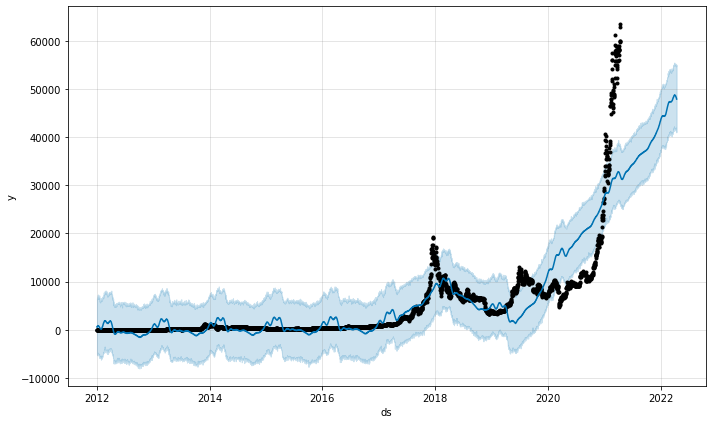

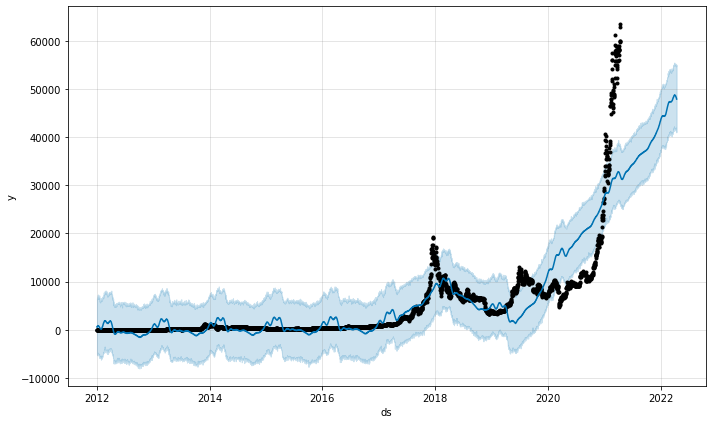

In [ ]:
from fbprophet import Prophet
m = Prophet()
m.fit(date_y)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
m.plot(forecast)

In [ ]:
# Transposing Forecast to get all columns

forecast.tail().T

,3750,3751,3752,3753,3754
ds,2022-04-10 00:00:00,2022-04-11 00:00:00,2022-04-12 00:00:00,2022-04-13 00:00:00,2022-04-14 00:00:00
trend,46992,47035.6,47079.1,47122.7,47166.2
yhat_lower,41475.9,41169.8,40982.7,41050.3,41180.5
yhat_upper,54993.6,54697.9,54696.8,55039.3,54524.3
trend_lower,43896,43927.5,43965.4,44004.4,44043.4
trend_upper,49830.8,49886.5,49942.6,49996.4,50049.1
additive_terms,1326.35,1208.25,1064.98,939.663,719.163
additive_terms_lower,1326.35,1208.25,1064.98,939.663,719.163
additive_terms_upper,1326.35,1208.25,1064.98,939.663,719.163
weekly,-7.76754,11.5946,11.1297,32.2199,-40.1051


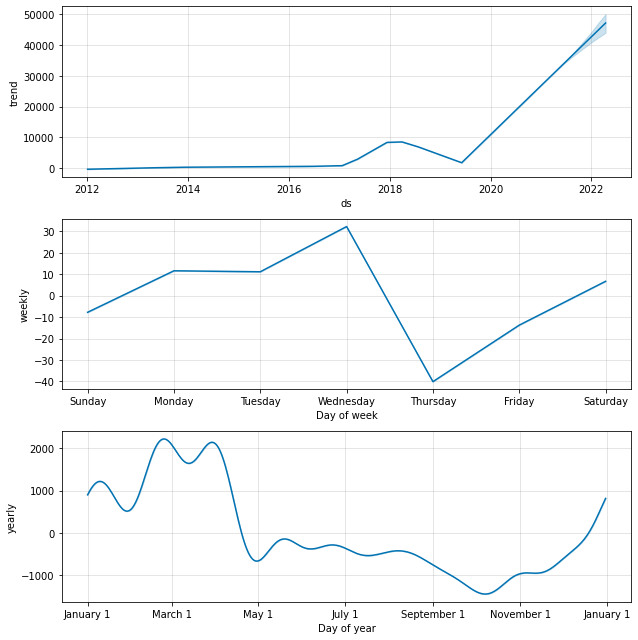

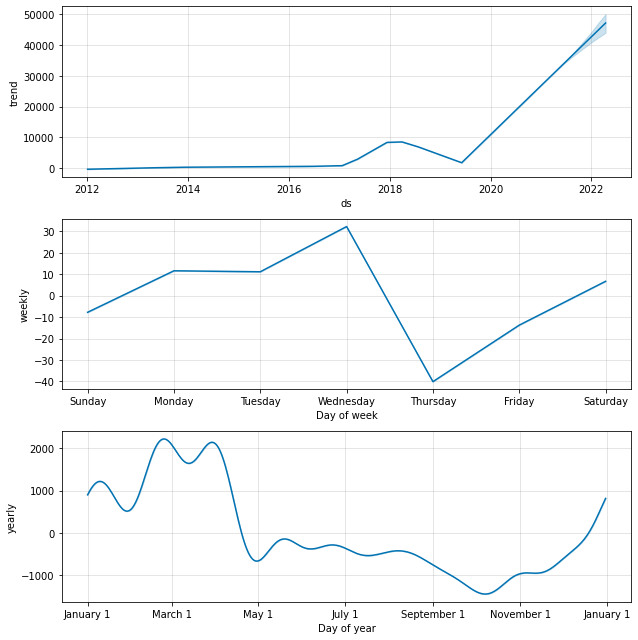

In [ ]:
m.plot_components(forecast)

In [ ]:
import pickle
pickle.dump(m, open('model.pkl', 'wb'))

In [ ]:
from fbprophet.diagnostics import cross_validation, performance_metrics
cv_results = cross_validation(model = m, initial = '730 days', horizon = '365 days')

perf_df = performance_metrics(cv_results)
perf_df

INFO:fbprophet:Making 13 forecasts with cutoffs between 2014-04-16 00:00:00 and 2020-04-14 00:00:00


,horizon,mse,rmse,mae,mape,mdape,coverage
0,36 days 12:00:00,3.673574e+06,1916.656918,1234.972810,0.294000,0.282851,0.428270
1,37 days 00:00:00,3.709464e+06,1925.996821,1239.555242,0.294908,0.283875,0.426763
2,37 days 12:00:00,3.807165e+06,1951.195715,1252.996112,0.299001,0.284163,0.424051
3,38 days 00:00:00,3.857315e+06,1964.004734,1259.436555,0.300140,0.284163,0.423146
4,38 days 12:00:00,3.965851e+06,1991.444560,1273.402657,0.304516,0.285152,0.424051
...,...,...,...,...,...,...,...
653,363 days 00:00:00,1.960011e+08,14000.040572,6960.396274,1.045311,0.757417,0.160338
654,363 days 12:00:00,1.926039e+08,13878.181845,6864.081490,1.032193,0.754497,0.164557
655,364 days 00:00:00,1.983564e+08,14083.906359,6991.061570,1.046078,0.757417,0.160338
656,364 days 12:00:00,1.947929e+08,13956.823133,6894.155392,1.033080,0.754497,0.164557


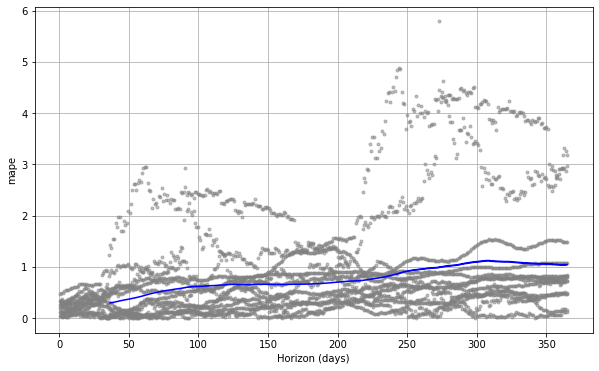

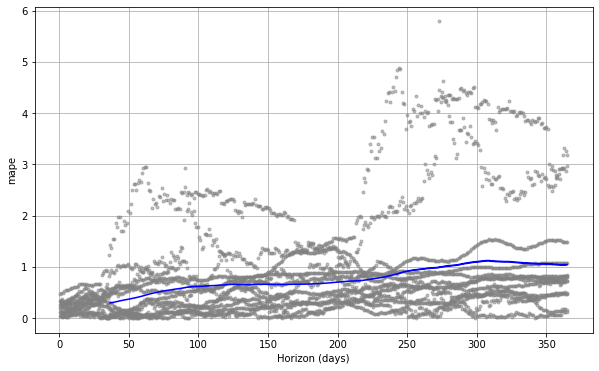

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(cv_results, metric="mape")

In [ ]:
!pip install prophet

     |████████████████████████████████| 71kB 3.2MB/s 
     |████████████████████████████████| 51kB 4.5MB/s 
     |████████████████████████████████| 184kB 16.1MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-cp37-none-any.whl size=6639772 sha256=2f6a5db5abb7f0b177a0b513dfff480dd03be3f1dbaa024c66207e1a34c149a8
  Stored in directory: /root/.cache/pip/wheels/92/1d/02/bc0a91bd3a84e060722075d2b0b68e875e37ec7dc49451d513
Successfully built prophet
ERROR: fbprophet 0.7.1 has requirement cmdstanpy==0.9.5, but you'll have cmdstanpy 0.9.68 which is incompatible.
  Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5


In [ ]:
import json


from prophet.serialize import model_to_json, model_from_json

with open('serialized_model.json', 'w') as fout:
    json.dump(model_to_json(m), fout)  # Save model

## Multivariate Model

In [ ]:
dir(fbprophet)

['Prophet',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'diagnostics',
 'forecaster',
 'hdays',
 'make_holidays',
 'models',
 'plot']

In [ ]:
bitcoin_copy.fillna(method="bfill", inplace=True)

In [ ]:
model = Prophet()

model.add_regressor('trend_bitcoins', standardize= False)

model.add_regressor('open_bitcoin', standardize= False)
model.add_regressor('high_bitcoin', standardize= False)
model.add_regressor('low_bitcoin', standardize= False)
model.add_regressor('vol_bitcoin', standardize= False)
model.add_regressor('Change_bitcoin_%', standardize= False)

model.add_regressor('price_dowjones', standardize= False)
model.add_regressor('open_dowjones', standardize= False)
model.add_regressor('high_dowjones', standardize= False)
model.add_regressor('low_dowjones', standardize= False)
model.add_regressor('vol_dowjones', standardize= False)
model.add_regressor('change_dowjones', standardize= False)

model.add_regressor('price_nasdaq', standardize= False)
model.add_regressor('open_nasdaq', standardize= False)
model.add_regressor('high_nasdaq', standardize= False)
model.add_regressor('low_nasdaq', standardize= False)
model.add_regressor('vol_nasdaq', standardize= False)
model.add_regressor('change_nasdaq', standardize= False)

model.add_regressor('price_sp', standardize= False)
model.add_regressor('open_sp', standardize= False)
model.add_regressor('high_sp', standardize= False)
model.add_regressor('low_sp', standardize= False)
model.add_regressor('change_sp', standardize= False)

model.add_regressor('SMA_7', standardize= False)
model.add_regressor('SMA_25', standardize= False)
model.add_regressor('SMA_50', standardize= False)
model.add_regressor('SMA_200', standardize= False)

model.add_regressor('Min_7', standardize= False)
model.add_regressor('Min_25', standardize= False)
model.add_regressor('Min_50', standardize= False)
model.add_regressor('Min_200', standardize= False)

model.add_regressor('Max_7', standardize= False)
model.add_regressor('Max_25', standardize= False)
model.add_regressor('Max_50', standardize= False)
model.add_regressor('Max_200', standardize= False)

model.add_regressor('Median_7', standardize= False)
model.add_regressor('Median_25', standardize= False)
model.add_regressor('Median_50', standardize= False)
model.add_regressor('Median_200', standardize= False)

model.add_regressor('Deviation_7', standardize= False)
model.add_regressor('Deviation_25', standardize= False)
model.add_regressor('Deviation_50', standardize= False)
model.add_regressor('Deviation_200', standardize= False)

model.add_regressor('Variance_7', standardize= False)
model.add_regressor('Variance_25', standardize= False)
model.add_regressor('Variance_50', standardize= False)
model.add_regressor('Variance_200', standardize= False)

model.add_regressor('Sum_7', standardize= False)
model.add_regressor('Sum_25', standardize= False)
model.add_regressor('Sum_50', standardize= False)
model.add_regressor('Sum_200', standardize= False)

In [ ]:
train = bitcoin_copy[bitcoin_copy["ds"]<= "2020-05-31"]
train.rename(columns={"ds":"ds", "price_bitcoin":"y"}, inplace=True)
train.shape

(3072, 53)

In [ ]:
test = bitcoin_copy[bitcoin_copy["ds"]> "2020-05-31"]
test.rename(columns={"ds":"ds", "price_bitcoin":"y"}, inplace=True)
test.shape

(318, 53)

In [ ]:
model.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future_multivariate = model.make_future_dataframe(periods=318)

future_multivariate["trend_bitcoins"] = bitcoin_copy["trend_bitcoins"]

future_multivariate["open_bitcoin"] = bitcoin_copy["open_bitcoin"]
future_multivariate["high_bitcoin"] = bitcoin_copy["high_bitcoin"]
future_multivariate["low_bitcoin"] = bitcoin_copy["low_bitcoin"]
future_multivariate["vol_bitcoin"] = bitcoin_copy["vol_bitcoin"]
future_multivariate["Change_bitcoin_%"] = bitcoin_copy["Change_bitcoin_%"]

future_multivariate["price_dowjones"] = bitcoin_copy["price_dowjones"]
future_multivariate["open_dowjones"] = bitcoin_copy["open_dowjones"]
future_multivariate["high_dowjones"] = bitcoin_copy["high_dowjones"]
future_multivariate["low_dowjones"] = bitcoin_copy["low_dowjones"]
future_multivariate["vol_dowjones"] = bitcoin_copy["vol_dowjones"]
future_multivariate["change_dowjones"] = bitcoin_copy["change_dowjones"]

future_multivariate["price_nasdaq"] = bitcoin_copy["price_nasdaq"]
future_multivariate["open_nasdaq"] = bitcoin_copy["open_nasdaq"]
future_multivariate["high_nasdaq"] = bitcoin_copy["high_nasdaq"]
future_multivariate["low_nasdaq"] = bitcoin_copy["low_nasdaq"]
future_multivariate["vol_nasdaq"] = bitcoin_copy["vol_nasdaq"]
future_multivariate["change_nasdaq"] = bitcoin_copy["change_nasdaq"]

future_multivariate["price_sp"] = bitcoin_copy["price_sp"]
future_multivariate["open_sp"] = bitcoin_copy["open_sp"]
future_multivariate["high_sp"] = bitcoin_copy["high_sp"]
future_multivariate["low_sp"] = bitcoin_copy["low_sp"]
future_multivariate["change_sp"] = bitcoin_copy["change_sp"]

future_multivariate["SMA_7"] = bitcoin_copy["SMA_7"]
future_multivariate["SMA_25"] = bitcoin_copy["SMA_25"]
future_multivariate["SMA_50"] = bitcoin_copy["SMA_50"]
future_multivariate["SMA_200"] = bitcoin_copy["SMA_200"]

future_multivariate["Min_7"] = bitcoin_copy["Min_7"]
future_multivariate["Min_25"] = bitcoin_copy["Min_25"]
future_multivariate["Min_50"] = bitcoin_copy["Min_50"]
future_multivariate["Min_200"] = bitcoin_copy["Min_200"]

future_multivariate["Max_7"] = bitcoin_copy["Max_7"]
future_multivariate["Max_25"] = bitcoin_copy["Max_25"]
future_multivariate["Max_50"] = bitcoin_copy["Max_50"]
future_multivariate["Max_200"] = bitcoin_copy["Max_200"]

future_multivariate["Median_7"] = bitcoin_copy["Median_7"]
future_multivariate["Median_25"] = bitcoin_copy["Median_25"]
future_multivariate["Median_50"] = bitcoin_copy["Median_50"]
future_multivariate["Median_200"] = bitcoin_copy["Median_200"]

future_multivariate["Deviation_7"] = bitcoin_copy["Deviation_7"]
future_multivariate["Deviation_25"] = bitcoin_copy["Deviation_25"]
future_multivariate["Deviation_50"] = bitcoin_copy["Deviation_50"]
future_multivariate["Deviation_200"] = bitcoin_copy["Deviation_200"]

future_multivariate["Variance_7"] = bitcoin_copy["Variance_7"]
future_multivariate["Variance_25"] = bitcoin_copy["Variance_25"]
future_multivariate["Variance_50"] = bitcoin_copy["Variance_50"]
future_multivariate["Variance_200"] = bitcoin_copy["Variance_200"]

future_multivariate["Sum_7"] = bitcoin_copy["Sum_7"]
future_multivariate["Sum_25"] = bitcoin_copy["Sum_25"]
future_multivariate["Sum_50"] = bitcoin_copy["Sum_50"]
future_multivariate["Sum_200"] = bitcoin_copy["Sum_200"]

In [ ]:
forecast_multivariate = m.predict(future_multivariate)
forecast_multivariate[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3385,2021-04-10,32403.497510,26359.969176,38302.919178
3386,2021-04-11,32293.640960,26599.329850,38558.466425
3387,2021-04-12,32212.675087,26276.488894,38496.352966
3388,2021-04-13,32108.742121,26034.120150,37818.011298
3389,2021-04-14,32025.051256,26356.797008,38211.694790


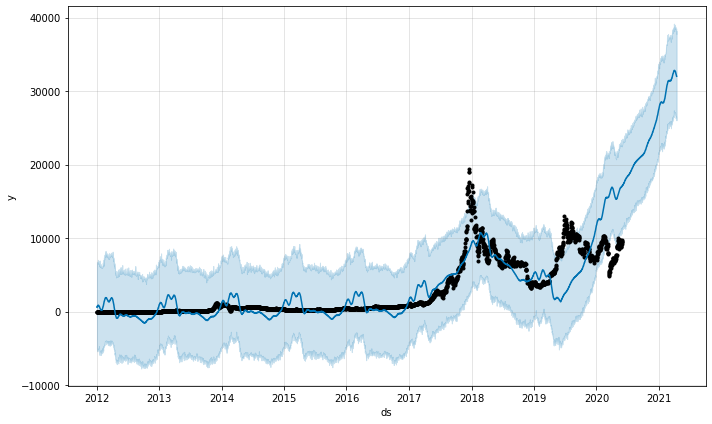

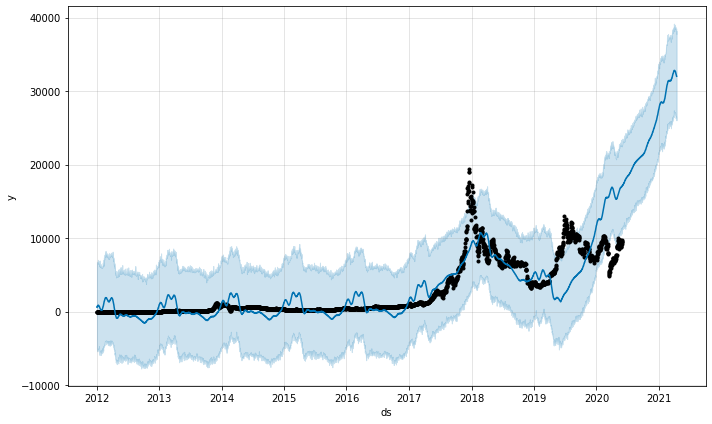

In [ ]:
model.plot(forecast_multivariate)

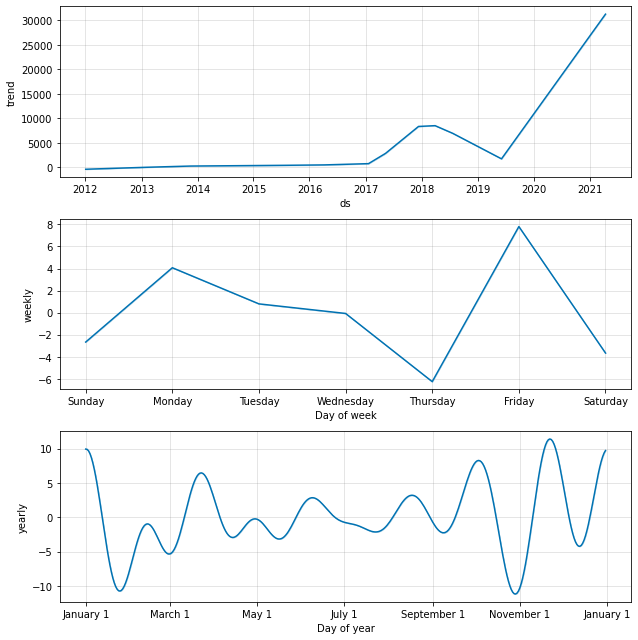

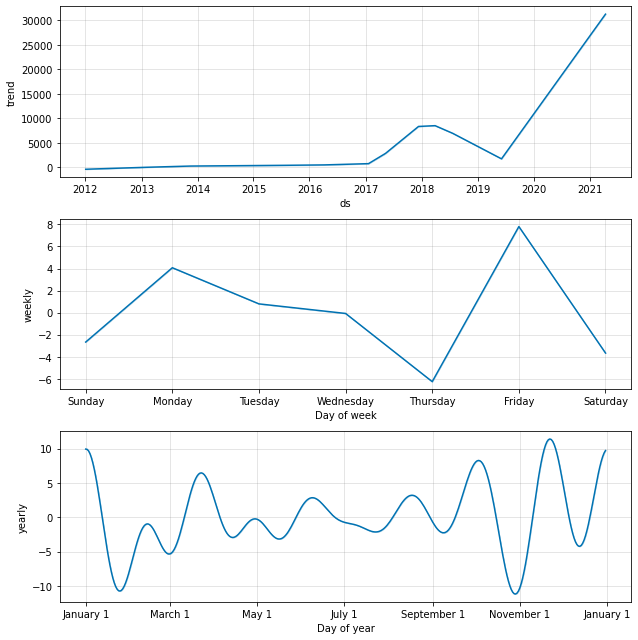

In [ ]:
model.plot_components(forecast_multivariate)

In [ ]:
cv_results_multivariate = cross_validation(model = model, initial = '730 days', horizon = '365 days')

perf_df_multivariate = performance_metrics(cv_results_multivariate)
perf_df_multivariate

INFO:fbprophet:Making 11 forecasts with cutoffs between 2014-06-02 00:00:00 and 2019-06-01 00:00:00


,horizon,mse,rmse,mae,mape,mdape,coverage
0,36 days 12:00:00,1.565928e+05,395.718071,140.485682,0.044748,0.015288,0.648379
1,37 days 00:00:00,1.564994e+05,395.600101,140.890098,0.046072,0.015370,0.646301
2,37 days 12:00:00,1.642318e+05,405.255169,145.133313,0.046347,0.015850,0.640898
3,38 days 00:00:00,1.643687e+05,405.424042,145.361217,0.047540,0.015898,0.644223
4,38 days 12:00:00,1.742355e+05,417.415301,150.247940,0.048008,0.015918,0.638404
...,...,...,...,...,...,...,...
653,363 days 00:00:00,2.144938e+06,1464.560849,548.834669,0.176410,0.017268,0.544472
654,363 days 12:00:00,2.077086e+06,1441.209869,538.430514,0.172832,0.017332,0.541147
655,364 days 00:00:00,2.112292e+06,1453.372789,546.797400,0.176529,0.017407,0.539485
656,364 days 12:00:00,2.053919e+06,1433.150146,535.841128,0.172866,0.017332,0.536160


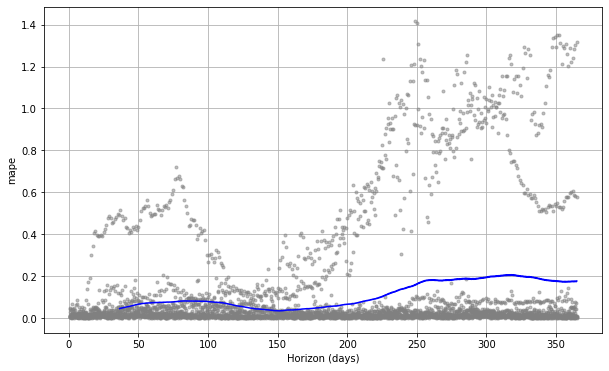

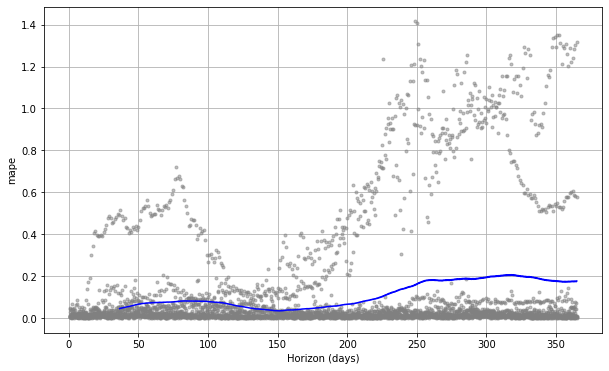

In [ ]:
plot_cross_validation_metric(cv_results_multivariate, metric="mape")

## FEATURE SELECTION

In [ ]:
bitcoin_copy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 53 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ds                3390 non-null   datetime64[ns]
 1   price_bitcoin     3390 non-null   float64       
 2   open_bitcoin      3390 non-null   float64       
 3   high_bitcoin      3390 non-null   float64       
 4   low_bitcoin       3390 non-null   float64       
 5   vol_bitcoin       3390 non-null   float64       
 6   Change_bitcoin_%  3390 non-null   float64       
 7   price_dowjones    3390 non-null   float64       
 8   open_dowjones     3390 non-null   float64       
 9   high_dowjones     3390 non-null   float64       
 10  low_dowjones      3390 non-null   float64       
 11  vol_dowjones      3390 non-null   float64       
 12  change_dowjones   3390 non-null   float64       
 13  price_nasdaq      3390 non-null   float64       
 14  open_nasdaq       3390 n

In [ ]:
X_y = bitcoin_copy.copy(deep=True)
X_y.rename(columns={"ds":"ds", "price_bitcoin":"y"}, inplace=True)
X = X_y.drop(columns=["ds","y"])
y = X_y.y

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

Feature 0: 985674.540828
Feature 1: 2631031.238494
Feature 2: 1668062.422356
Feature 3: 101.055770
Feature 4: 2.022660
Feature 5: 2524.406731
Feature 6: 2507.179161
Feature 7: 2519.744383
Feature 8: 2515.431161
Feature 9: 690.424313
Feature 10: 4.752317
Feature 11: 4327.346194
Feature 12: 4301.425915
Feature 13: 4308.963605
Feature 14: 4316.875492
Feature 15: 29.476647
Feature 16: 17.913120
Feature 17: 3070.588592
Feature 18: 3045.167923
Feature 19: 3064.863205
Feature 20: 3056.229661
Feature 21: 5.369169
Feature 22: 248.072161
Feature 23: 499463.059482
Feature 24: 134731.920484
Feature 25: 77348.070420
Feature 26: 11433.780768
Feature 27: 365771.906837
Feature 28: 75465.836193
Feature 29: 37583.467988
Feature 30: 4032.359644
Feature 31: 488771.439627
Feature 32: 195500.895068
Feature 33: 120174.787804
Feature 34: 32958.165280
Feature 35: 424055.058814
Feature 36: 110253.144747
Feature 37: 60989.961041
Feature 38: 6213.403717
Feature 39: 5924.368741
Feature 40: 7935.174372
Feature 41: 

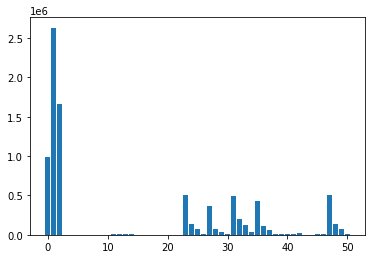

In [ ]:
# Correlation Feature Selection


# configure to select all features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

From the above plot we can see that about 23 features are highly correlated to the target. We can pick the top features, i.e. 0 (open_bitcoin), 1 (high_bitcoin), 2 (low_bitcoin), 23 (SMA_7), 24 (SMA_25), 25 (SMA_50), 26 (SMA_200), 27 (Min_7), 28 (Min_25), 29 (Min_50), 31 (Max_7), 32 (Max_25), 33 (Max_50), 34 (Max_200), 35 (Median_7), 36 (Median_25), 37 (Median_50), 41 (Deviation_50), 42 (Deviation_200), 47 (Sum_7), 48 (Sum_25), 49 (Sum_50) and 50 (Sum_200)

Feature 0: 3.732573
Feature 1: 4.304450
Feature 2: 4.217956
Feature 3: 0.720396
Feature 4: 0.098713
Feature 5: 2.129971
Feature 6: 2.174122
Feature 7: 2.166186
Feature 8: 2.117351
Feature 9: 0.954382
Feature 10: 0.254997
Feature 11: 2.332191
Feature 12: 2.301896
Feature 13: 2.384865
Feature 14: 2.301137
Feature 15: 0.611146
Feature 16: 0.294149
Feature 17: 2.253353
Feature 18: 2.277536
Feature 19: 2.313121
Feature 20: 2.221052
Feature 21: 0.306718
Feature 22: 0.758544
Feature 23: 3.425237
Feature 24: 3.025646
Feature 25: 2.982352
Feature 26: 2.971139
Feature 27: 3.625522
Feature 28: 3.132920
Feature 29: 2.958220
Feature 30: 2.692839
Feature 31: 3.815061
Feature 32: 3.377486
Feature 33: 3.176022
Feature 34: 2.823634
Feature 35: 3.425549
Feature 36: 2.976817
Feature 37: 2.873963
Feature 38: 3.009214
Feature 39: 1.364231
Feature 40: 1.860058
Feature 41: 2.092707
Feature 42: 2.622097
Feature 43: 1.043205
Feature 44: 1.292525
Feature 45: 1.462766
Feature 46: 1.781143
Feature 47: 3.422690
Fe

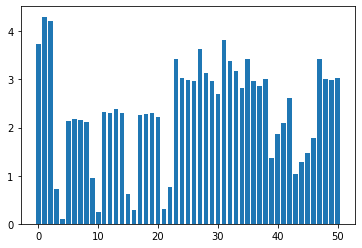

In [ ]:
# Mutual Information Selection

# Mutual information from the field of information theory is the application of information gain 
# (typically used in the construction of decision trees) to feature selection.
# Mutual information is calculated between two variables and measures the reduction 
# in uncertainty for one variable given a known value of the other variable.

from sklearn.feature_selection import mutual_info_regression

# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=mutual_info_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

From the above, we can see alot more features are considered to be important and could be due to stochastic nature of the algorithm or evaluation procedure or differences in numerical precision.

## MODEL WITH FEATURE SELECTION

In [ ]:
m_features = Prophet()
m_features.add_regressor('open_bitcoin', standardize= False)
m_features.add_regressor('high_bitcoin', standardize= False)
m_features.add_regressor('low_bitcoin', standardize= False)

m_features.add_regressor('SMA_7', standardize= False)
m_features.add_regressor('SMA_25', standardize= False)
m_features.add_regressor('SMA_50', standardize= False)
m_features.add_regressor('SMA_200', standardize= False)

m_features.add_regressor('Min_7', standardize= False)
m_features.add_regressor('Min_25', standardize= False)
m_features.add_regressor('Min_50', standardize= False)


m_features.add_regressor('Max_7', standardize= False)
m_features.add_regressor('Max_25', standardize= False)
m_features.add_regressor('Max_50', standardize= False)
m_features.add_regressor('Max_200', standardize= False)

m_features.add_regressor('Median_7', standardize= False)
m_features.add_regressor('Median_25', standardize= False)
m_features.add_regressor('Median_50', standardize= False)

m_features.add_regressor('Deviation_50', standardize= False)
m_features.add_regressor('Deviation_200', standardize= False)

m_features.add_regressor('Variance_7', standardize= False)
m_features.add_regressor('Variance_25', standardize= False)
m_features.add_regressor('Variance_50', standardize= False)
m_features.add_regressor('Variance_200', standardize= False)

m_features.add_regressor('Sum_7', standardize= False)
m_features.add_regressor('Sum_25', standardize= False)
m_features.add_regressor('Sum_50', standardize= False)
m_features.add_regressor('Sum_200', standardize= False)

In [ ]:
train_features = train[['ds','y','open_bitcoin','high_bitcoin','low_bitcoin',
                        'SMA_7','SMA_25','SMA_50','SMA_200',
                        'Min_7','Min_25','Min_50',
                        'Max_7','Max_25','Max_50','Max_200',
                        'Median_7','Median_25','Median_50',
                        'Deviation_50','Deviation_200',
                        'Variance_7','Variance_25','Variance_50','Variance_200',
                        'Sum_7','Sum_25','Sum_50','Sum_200']]
train_features.head()

,ds,y,open_bitcoin,high_bitcoin,low_bitcoin,SMA_7,SMA_25,SMA_50,SMA_200,Min_7,Min_25,Min_50,Max_7,Max_25,Max_50,Max_200,Median_7,Median_25,Median_50,Deviation_50,Deviation_200,Variance_7,Variance_25,Variance_50,Variance_200,Sum_7,Sum_25,Sum_50,Sum_200
0,2012-01-03,4.9,5.2,5.3,4.7,4.900,4.900,4.900,4.900,4.9,4.9,4.9,4.9,4.9,4.9,4.9,4.90,4.90,4.90,0.494975,0.494975,0.245000,0.245000,0.245000,0.245000,4.9,4.9,4.9,4.9
1,2012-01-04,5.6,4.9,5.7,4.8,5.250,5.250,5.250,5.250,4.9,4.9,4.9,5.6,5.6,5.6,5.6,5.25,5.25,5.25,0.494975,0.494975,0.245000,0.245000,0.245000,0.245000,10.5,10.5,10.5,10.5
2,2012-01-05,6.9,5.6,7.2,5.6,5.800,5.800,5.800,5.800,4.9,4.9,4.9,6.9,6.9,6.9,6.9,5.60,5.60,5.60,1.014889,1.014889,1.030000,1.030000,1.030000,1.030000,17.4,17.4,17.4,17.4
3,2012-01-06,6.7,6.9,7.2,6.1,6.025,6.025,6.025,6.025,4.9,4.9,4.9,6.9,6.9,6.9,6.9,6.15,6.15,6.15,0.942956,0.942956,0.889167,0.889167,0.889167,0.889167,24.1,24.1,24.1,24.1
4,2012-01-07,6.8,6.7,7.0,6.4,6.180,6.180,6.180,6.180,4.9,4.9,4.9,6.9,6.9,6.9,6.9,6.70,6.70,6.70,0.887130,0.887130,0.787000,0.787000,0.787000,0.787000,30.9,30.9,30.9,30.9


In [ ]:
m_features.fit(train_features)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future_features = m_features.make_future_dataframe(periods=318)

future_features["open_bitcoin"] = bitcoin_copy["open_bitcoin"]
future_features["high_bitcoin"] = bitcoin_copy["high_bitcoin"]
future_features ["low_bitcoin"] = bitcoin_copy["low_bitcoin"]

future_features["SMA_7"] = bitcoin_copy["SMA_7"]
future_features["SMA_25"] = bitcoin_copy["SMA_25"]
future_features["SMA_50"] = bitcoin_copy["SMA_50"]
future_features["SMA_200"] = bitcoin_copy["SMA_200"]

future_features["Min_7"] = bitcoin_copy["Min_7"]
future_features["Min_25"] = bitcoin_copy["Min_25"]
future_features["Min_50"] = bitcoin_copy["Min_50"]

future_features["Max_7"] = bitcoin_copy["Max_7"]
future_features["Max_25"] = bitcoin_copy["Max_25"]
future_features["Max_50"] = bitcoin_copy["Max_50"]
future_features["Max_200"] = bitcoin_copy["Max_200"]

future_features["Median_7"] = bitcoin_copy["Median_7"]
future_features["Median_25"] = bitcoin_copy["Median_25"]
future_features["Median_50"] = bitcoin_copy["Median_50"]

future_features["Deviation_50"] = bitcoin_copy["Deviation_50"]
future_features["Deviation_200"] = bitcoin_copy["Deviation_200"]

future_features["Variance_7"] = bitcoin_copy["Variance_7"]
future_features["Variance_25"] = bitcoin_copy["Variance_25"]
future_features["Variance_50"] = bitcoin_copy["Variance_50"]
future_features["Variance_200"] = bitcoin_copy["Variance_200"]

future_features["Sum_7"] = bitcoin_copy["Sum_7"]
future_features["Sum_25"] = bitcoin_copy["Sum_25"]
future_features["Sum_50"] = bitcoin_copy["Sum_50"]
future_features["Sum_200"] = bitcoin_copy["Sum_200"]

In [ ]:
forecast_features = m_features.predict(future_features)
forecast_features[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3385,2021-04-10,61030.135861,60922.831830,61134.159141
3386,2021-04-11,60660.796353,60547.242143,60773.311371
3387,2021-04-12,61207.106167,61100.820527,61311.592977
3388,2021-04-13,64279.085956,64174.343476,64388.580155
3389,2021-04-14,65024.019108,64926.303663,65126.300265


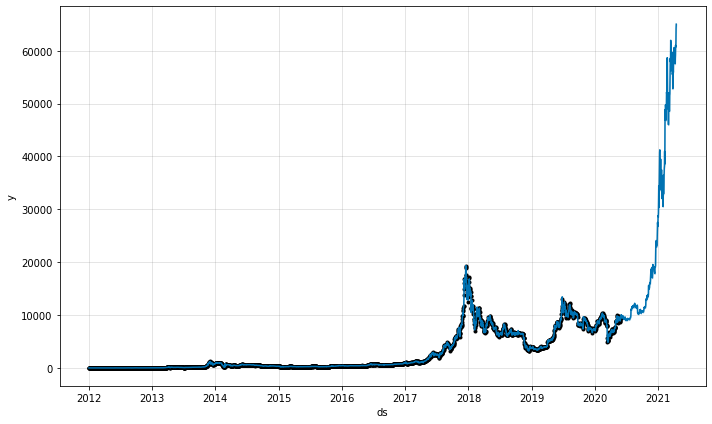

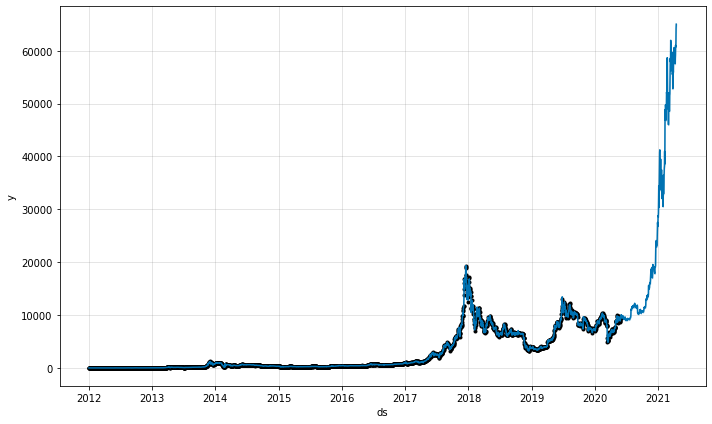

In [ ]:
m_features.plot(forecast_features)

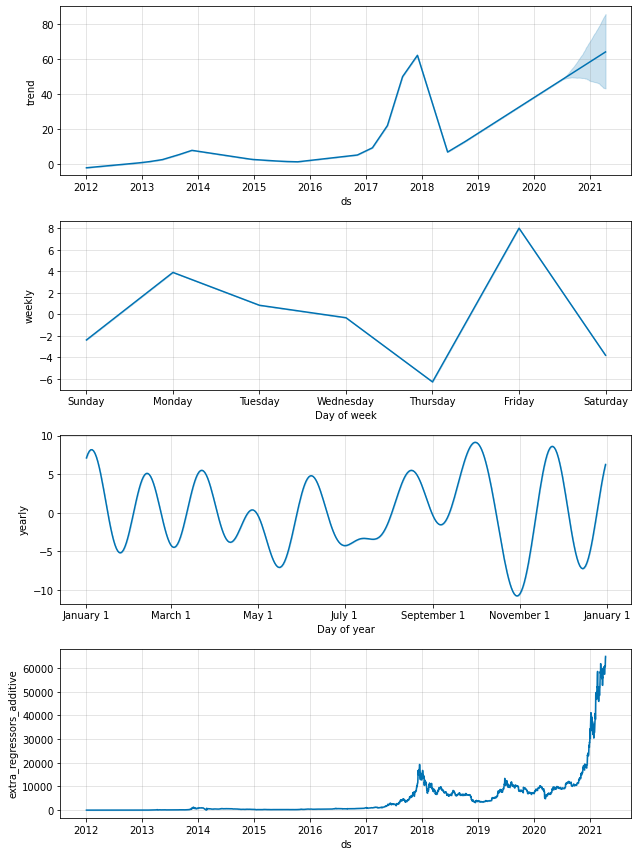

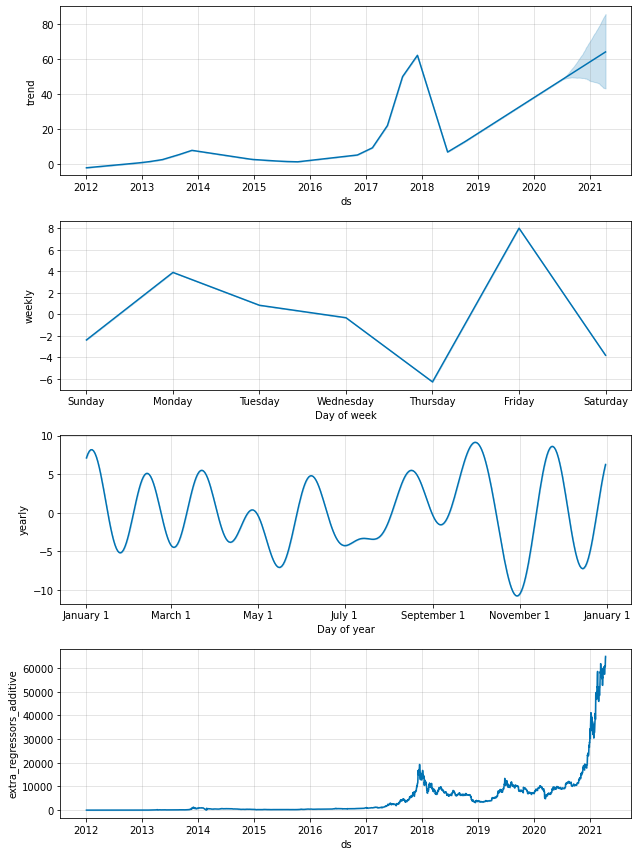

In [ ]:
m_features.plot_components(forecast_features)

In [ ]:
cv_features = cross_validation(model = m_features, initial = '731 days', horizon = '365 days')

perf_features = performance_metrics(cv_features)
perf_features

INFO:fbprophet:Making 11 forecasts with cutoffs between 2014-06-02 00:00:00 and 2019-06-01 00:00:00


,horizon,mse,rmse,mae,mape,mdape,coverage
0,36 days 12:00:00,1.304460e+05,361.173152,189.791465,0.148772,0.018801,0.673317
1,37 days 00:00:00,1.322051e+05,363.600225,191.043512,0.152004,0.018614,0.671654
2,37 days 12:00:00,1.323923e+05,363.857534,191.532448,0.151349,0.019219,0.670823
3,38 days 00:00:00,1.345515e+05,366.812640,193.047277,0.154380,0.019263,0.672070
4,38 days 12:00:00,1.344934e+05,366.733440,193.157495,0.153703,0.019292,0.670823
...,...,...,...,...,...,...,...
653,363 days 00:00:00,5.045919e+06,2246.312360,992.591181,0.145903,0.021329,0.509559
654,363 days 12:00:00,5.270979e+06,2295.861227,1008.798223,0.147339,0.021409,0.506234
655,364 days 00:00:00,5.266932e+06,2294.979655,1007.292362,0.147007,0.021329,0.502078
656,364 days 12:00:00,5.527720e+06,2351.110338,1025.573472,0.148507,0.021329,0.498753


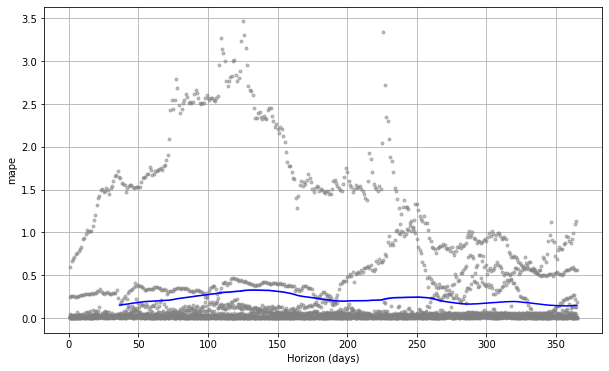

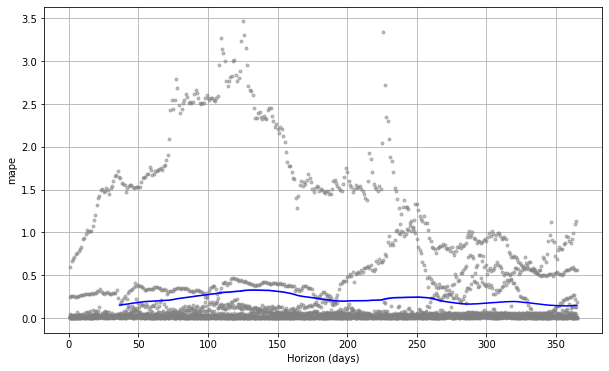

In [ ]:
plot_cross_validation_metric(cv_features, metric="mape")

# Challenging the Solution

In [ ]:
!pip install -U lppls

In [ ]:
from lppls import lppls, data_loader


bitcoin.head()

,Date,price_bitcoin,open_bitcoin,high_bitcoin,low_bitcoin,vol_bitcoin,Change_bitcoin_%,price_dowjones,open_dowjones,high_dowjones,low_dowjones,vol_dowjones,change_dowjones,price_nasdaq,open_nasdaq,high_nasdaq,low_nasdaq,vol_nasdaq,change_nasdaq,price_sp,open_sp,high_sp,low_sp,change_sp,trend_bitcoins,SMA_7,SMA_25,SMA_50,SMA_200,Min_7,Min_25,Min_50,Min_200,Max_7,Max_25,Max_50,Max_200,Median_7,Median_25,Median_50,Median_200,Deviation_7,Deviation_25,Deviation_50,Deviation_200,Variance_7,Variance_25,Variance_50,Variance_200,Sum_7,Sum_25,Sum_50,Sum_200
0,2012-01-03,4.9,5.2,5.3,4.7,125.17,6.51,12397.38,12221.19,12479.65,12221.19,152.56,1.47,2648.72,2657.39,2665.90,2641.98,411.79,1.67,1277.06,1258.86,1284.62,1258.86,1.55,38.0,4.900,4.900,4.900,4.900,4.9,4.9,4.9,4.9,4.9,4.9,4.9,4.9,4.90,4.90,4.90,4.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.9,4.9,4.9,4.9
1,2012-01-04,5.6,4.9,5.7,4.8,131.17,14.14,12418.42,12392.46,12430.00,12337.25,145.13,0.17,2648.36,2639.90,2653.18,2627.23,411.09,0.01,1277.30,1277.03,1278.73,1268.10,0.02,18.0,5.250,5.250,5.250,5.250,4.9,4.9,4.9,4.9,5.6,5.6,5.6,5.6,5.25,5.25,5.25,5.25,0.494975,0.494975,0.494975,0.494975,0.245000,0.245000,0.245000,0.245000,10.5,10.5,10.5,10.5
2,2012-01-05,6.9,5.6,7.2,5.6,182.33,24.78,12415.70,12418.42,12435.98,12283.90,158.44,0.02,2669.86,2642.57,2673.56,2631.23,442.08,0.81,1281.06,1277.30,1283.05,1265.26,0.29,25.0,5.800,5.800,5.800,5.800,4.9,4.9,4.9,4.9,6.9,6.9,6.9,6.9,5.60,5.60,5.60,5.60,1.014889,1.014889,1.014889,1.014889,1.030000,1.030000,1.030000,1.030000,17.4,17.4,17.4,17.4
3,2012-01-06,6.7,6.9,7.2,6.1,218.08,3.60,12359.92,12407.45,12415.24,12332.41,131.12,0.45,2674.22,2671.17,2682.12,2658.83,412.31,0.16,1277.81,1280.93,1281.84,1273.34,0.25,7.0,6.025,6.025,6.025,6.025,4.9,4.9,4.9,4.9,6.9,6.9,6.9,6.9,6.15,6.15,6.15,6.15,0.942956,0.942956,0.942956,0.942956,0.889167,0.889167,0.889167,0.889167,24.1,24.1,24.1,24.1
4,2012-01-07,6.8,6.7,7.0,6.4,48.39,1.64,12359.92,12407.45,12415.24,12332.41,131.12,0.45,2674.22,2671.17,2682.12,2658.83,412.31,0.16,1277.81,1280.93,1281.84,1273.34,0.25,30.0,6.180,6.180,6.180,6.180,4.9,4.9,4.9,4.9,6.9,6.9,6.9,6.9,6.70,6.70,6.70,6.70,0.887130,0.887130,0.887130,0.887130,0.787000,0.787000,0.787000,0.787000,30.9,30.9,30.9,30.9


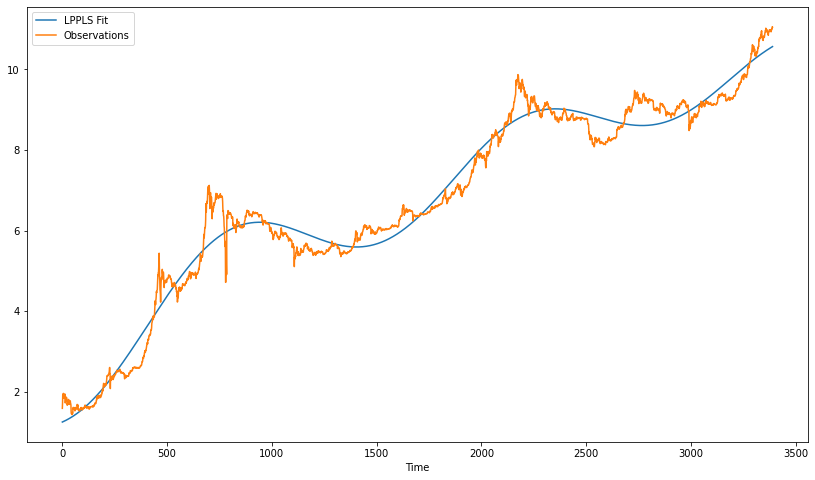

In [ ]:
# convert index col to evenly spaced numbers over a specified interval
time = np.linspace(0, len(bitcoin)-1, len(bitcoin))

# create list of observation data, in this case, 
# daily adjusted close prices of the S&P 500
# use log price
price = np.log(bitcoin['price_bitcoin'].values)

# create Mx2 matrix (expected format for LPPLS observations)
observations = np.array([time, price])

# set the max number for searches to perform before giving-up
# the literature suggests 25
MAX_SEARCHES = 25

# instantiate a new LPPLS model with the BITCOIN dataset
lppls_model = lppls.LPPLS(observations=observations)

# fit the model to the data and get back the params
tc, m, w, a, b, c, c1, c2 = lppls_model.fit(observations, MAX_SEARCHES, minimizer='Nelder-Mead')

# visualize the fit
lppls_model.plot_fit()

# Recommendations




We discourages any high risk investments on Bitcoin at the moment.

Potential investors are advised to wait.


# Follow up questions

## a). Did we have the right data?

YES

## b). Do we need other data to answer our question? 

YES

## c). Did we have the right question? 

YES

# Conclusion

The price of Bitcoin appears to be heavily influenced by the trends of the stock markets. 

There is  technical evidence suggesting  that we are indeed in a bitcoin bubble. 


#The project has been successful.